**Importing necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

**Data Loading**

In [2]:
df=pd.read_csv('/content/weather_prediction_dataset.csv')

In [3]:
df.shape

(3654, 165)

In [4]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ...                 0.5   
2              2.2             0.1  ...                -1.0   
3              3.9             0.5  ...                 2.5   
4              6.0             3.8  ...                -1.8   

   STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
0                 0.7               1.6            0.97          1.0275   
1                 2.0               2.0            0.99          1.0293   
2                 2.8               3.4            0.91          1.0267   
3                 4.6               4.9            0.95          1.0222   
4                 2.9               3.6            0.95          1.0209   

   TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
0                    0.25                 0.04              8.5   
1                    0.17                 0.16              7.9   
2                    0.27                 0.00              8.1   
3                    0.11                 0.44              8.6   
4                    0.39                 0.04              8.0   

   TOURS_temp_min  TOURS_temp_max  
0             7.2             9.8  
1             6.6             9.2  
2             6.6             9.6  
3             6.4            10.8  
4             6.4             9.5  

[5 rows x 165 columns]

In [5]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 3654 rows and 165 columns.


**Basic EDA**

In [6]:
print(df.dtypes)

DATE                        int64
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object


In [7]:
print(df.isnull().sum())

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64


In [8]:
df.describe()

DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380             0.234849   
std          0.007962                0.935348             0.536267   
min          0.985600                0.050000             0.000000   
25%          1.013300                0.530000             0.000000   
50%          1.017700                1.110000             0.000000   
75%          1.022700                2.060000             0.210000   
max          1.040800                3.550000             7.570000   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
count     3654.000000      3654.000000     3654.000000  ...   
mean         4.661193        11.022797        6.989135  ...   
std          4.330112         7.414754        6.653356  ...   
min          0.000000        -9.300000      -16.000000  ...   
25%          0.500000         5.300000        2.000000  ...   
50%          3.600000        11.400000        7.300000  ...   
75%          8.000000        16.900000       12.400000  ...   
max         15.300000        29.000000       20.800000  ...   

       STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
count         3654.000000         3654.000000       3654.000000   
mean             5.104215           11.470635          3.677258   
std              7.250744            8.950217          1.519866   
min            -19.700000          -14.500000          0.700000   
25%              0.000000            4.100000          2.600000   
50%              5.000000           11.000000          3.400000   
75%             11.200000           19.000000          4.600000   
max             21.200000           32.900000         10.800000   

       TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
count     3654.000000     3654.000000             3654.000000   
mean         0.781872        1.016639                1.369787   
std          0.115572        0.018885                0.926472   
min          0.330000        0.000300                0.050000   
25%          0.700000        1.012100                0.550000   
50%          0.800000        1.017300                1.235000   
75%          0.870000        1.022200                2.090000   
max          1.000000        1.041400                3.560000   

       TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  
count          3654.000000      3654.000000     3654.000000     3654.000000  
mean              0.186100        12.205802        7.860536       16.551779  
std               0.422151         6.467155        5.692256        7.714924  
min               0.000000        -6.200000      -13.000000       -3.100000  
25%               0.000000         7.600000        3.700000       10.800000  
50%               0.000000        12.300000        8.300000       16.600000  
75%               0.160000        17.200000       12.300000       22.400000  
max               6.200000        31.200000       22.600000       39.800000  

[8 rows x 165 columns]

In [9]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [10]:
exclude_cols = ['date', 'month']  # Use your actual column names here

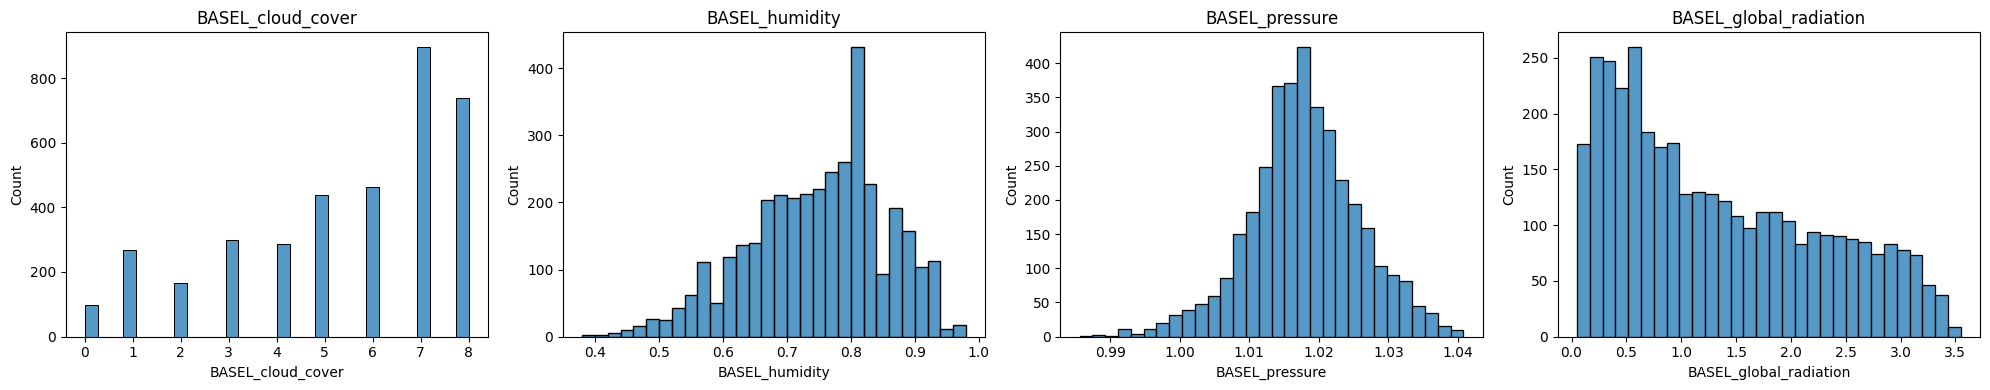

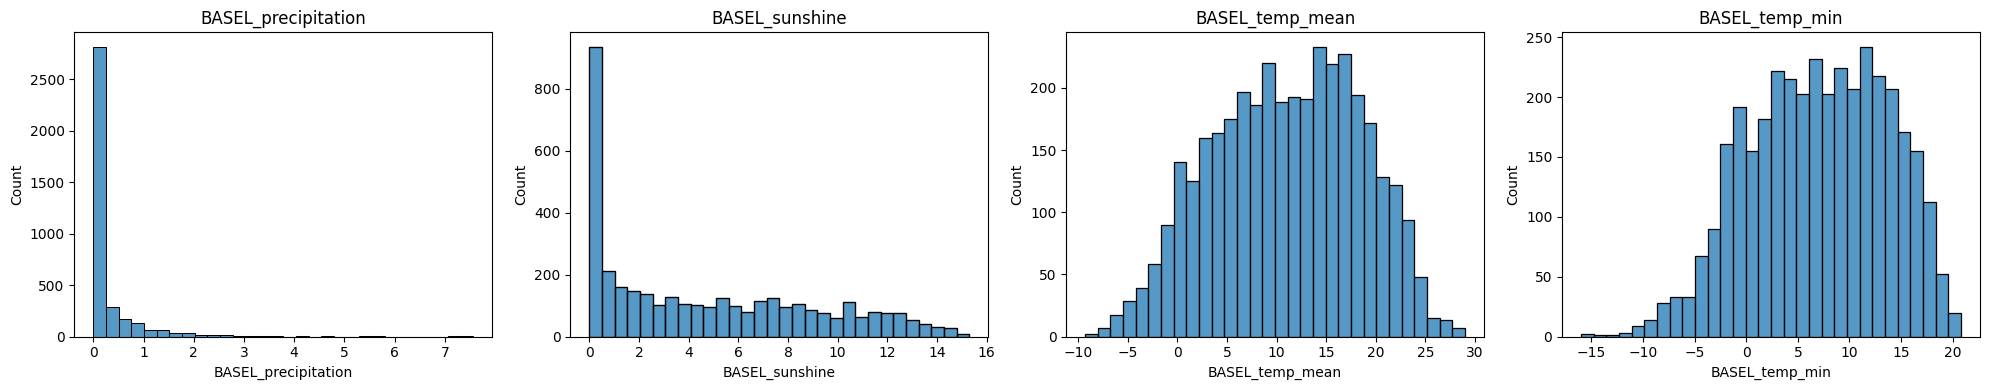

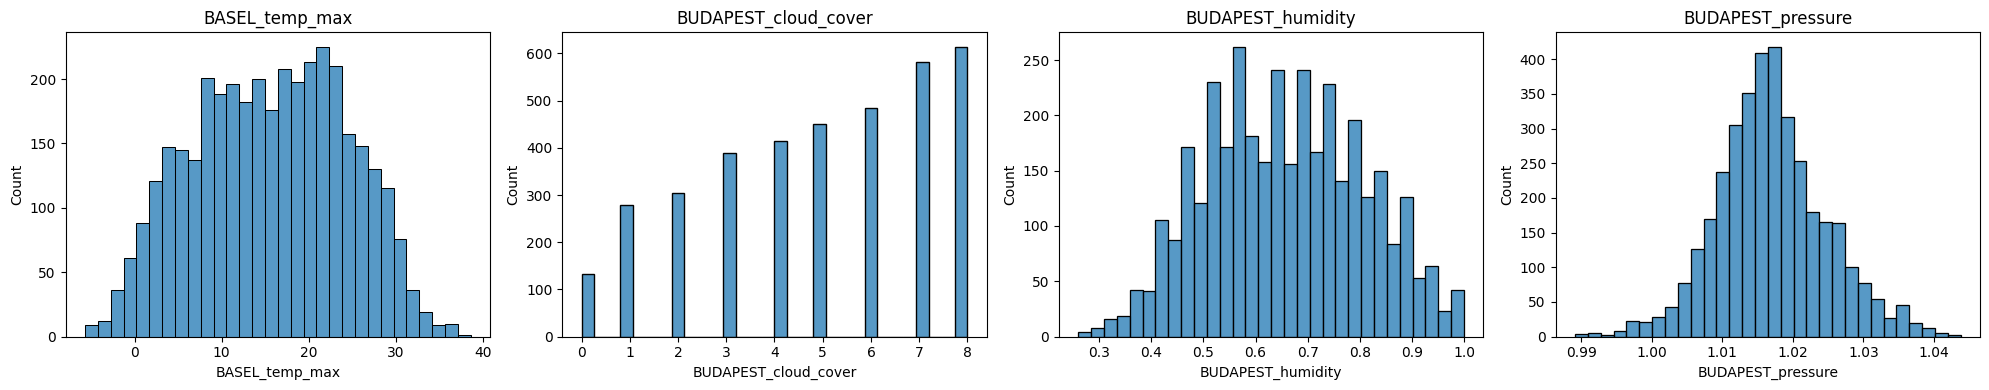

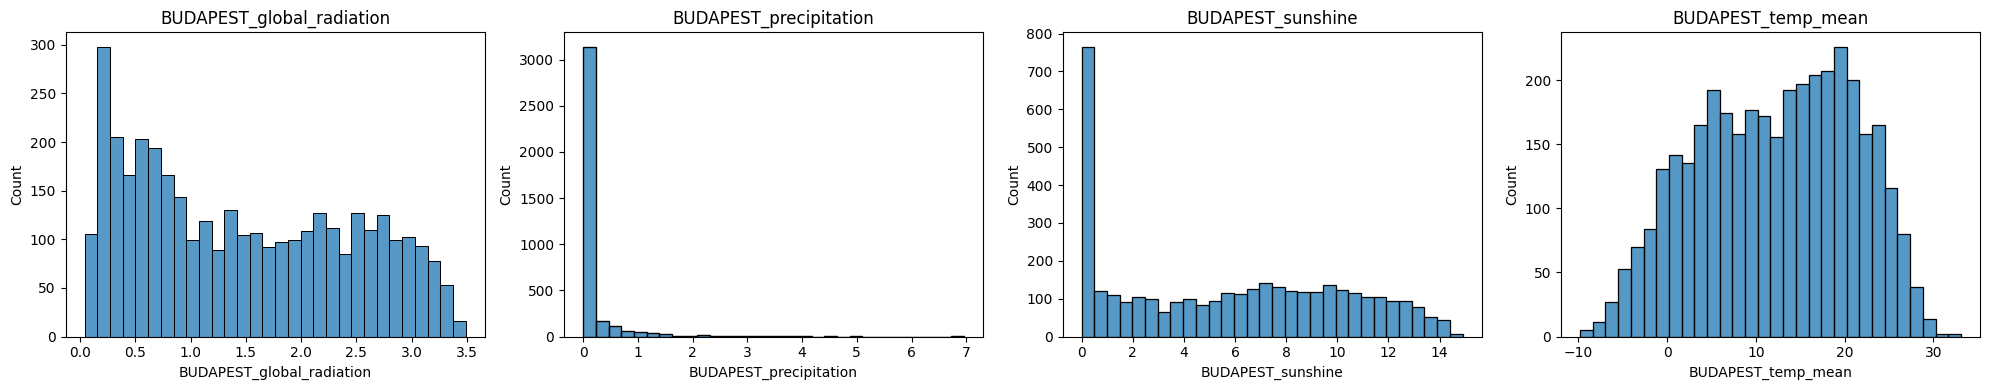

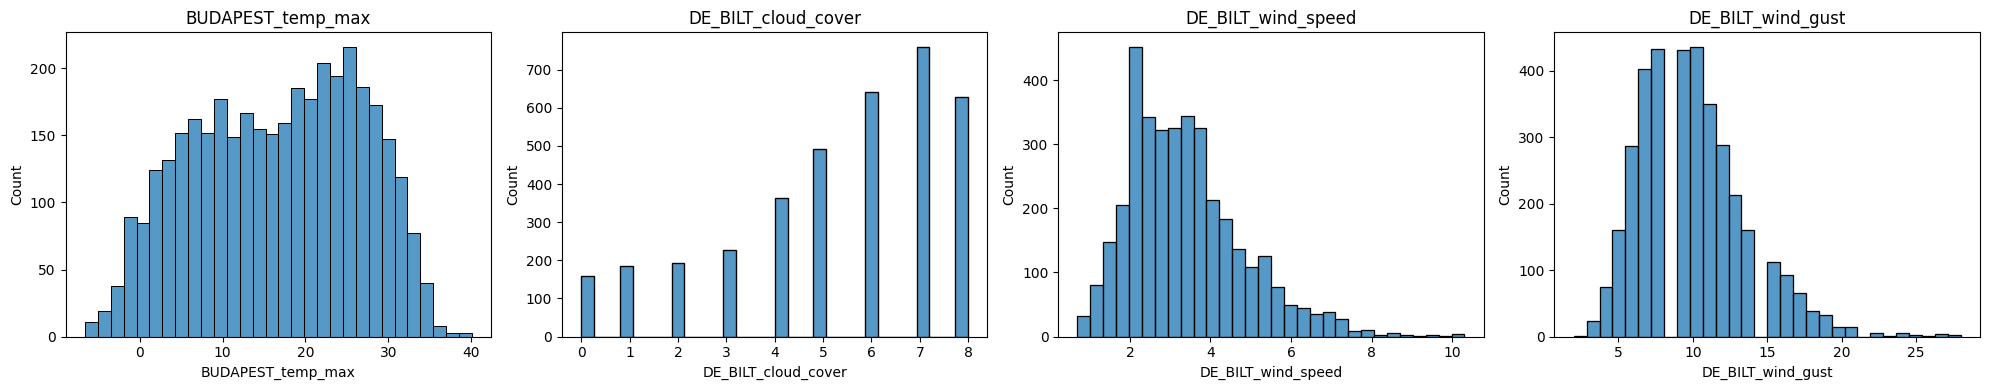

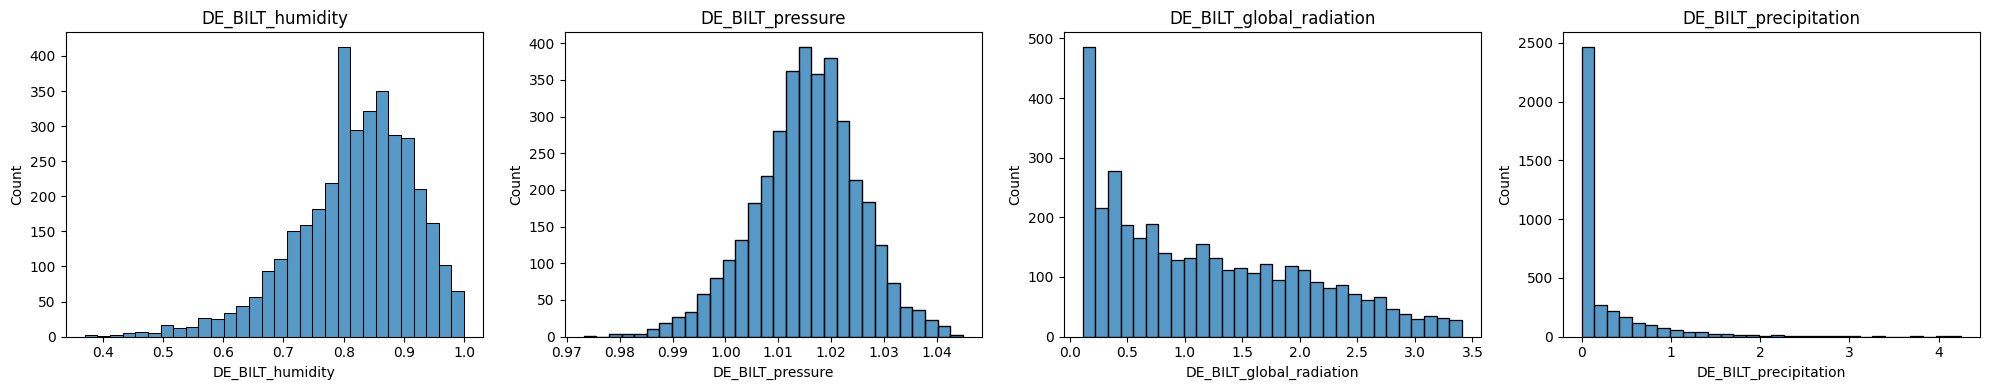

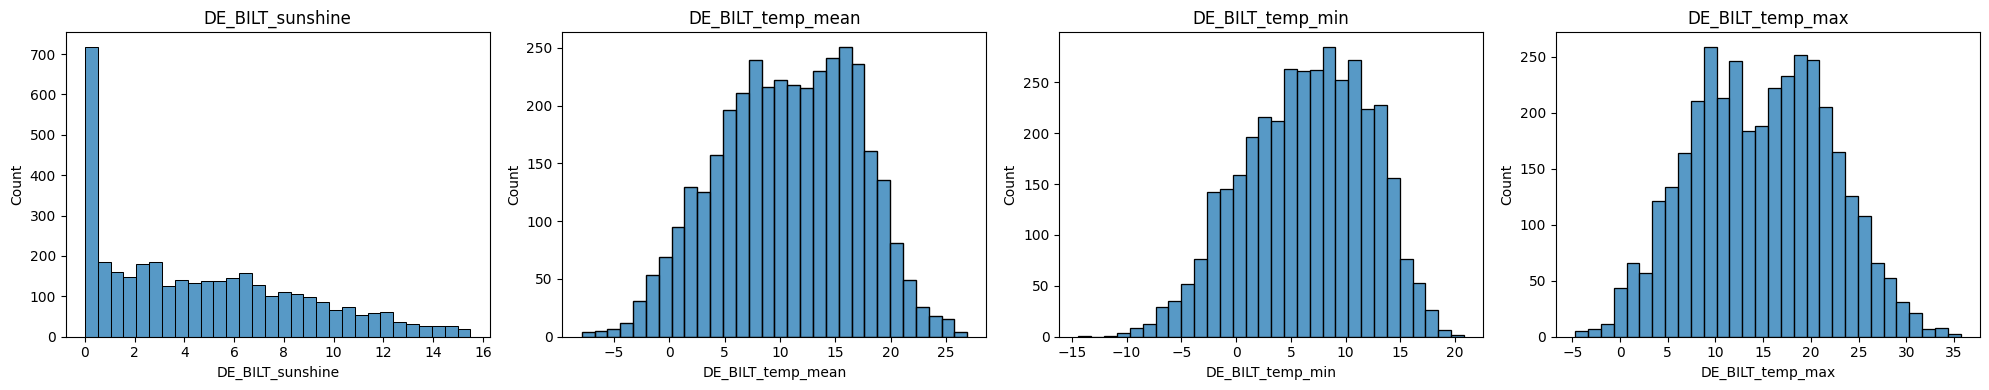

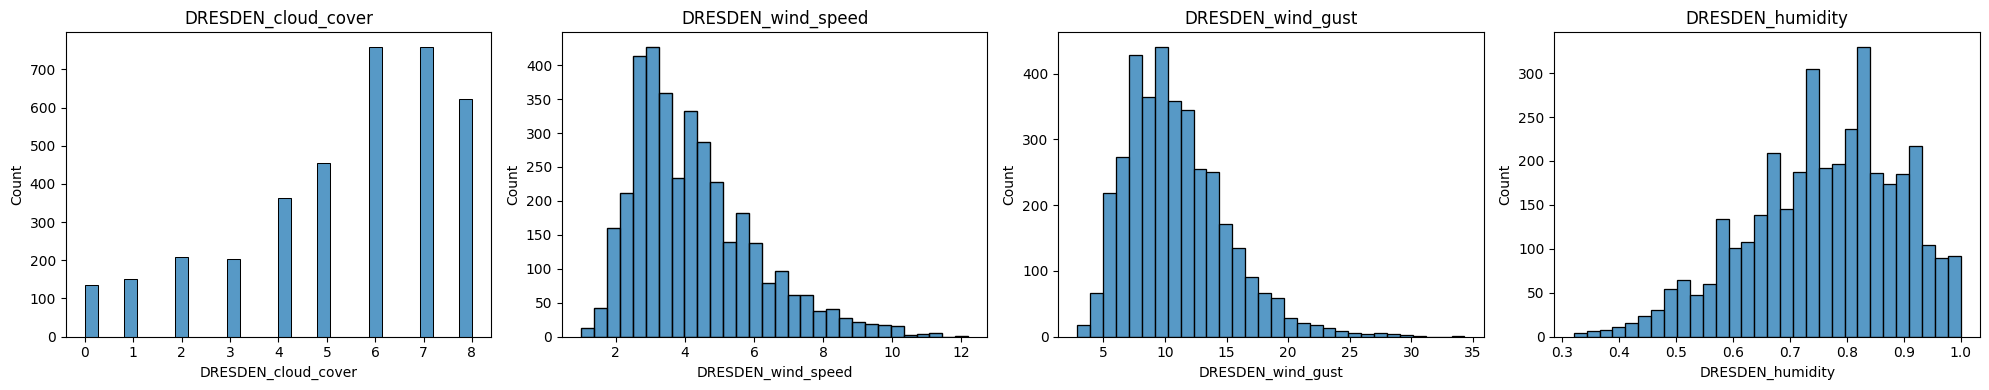

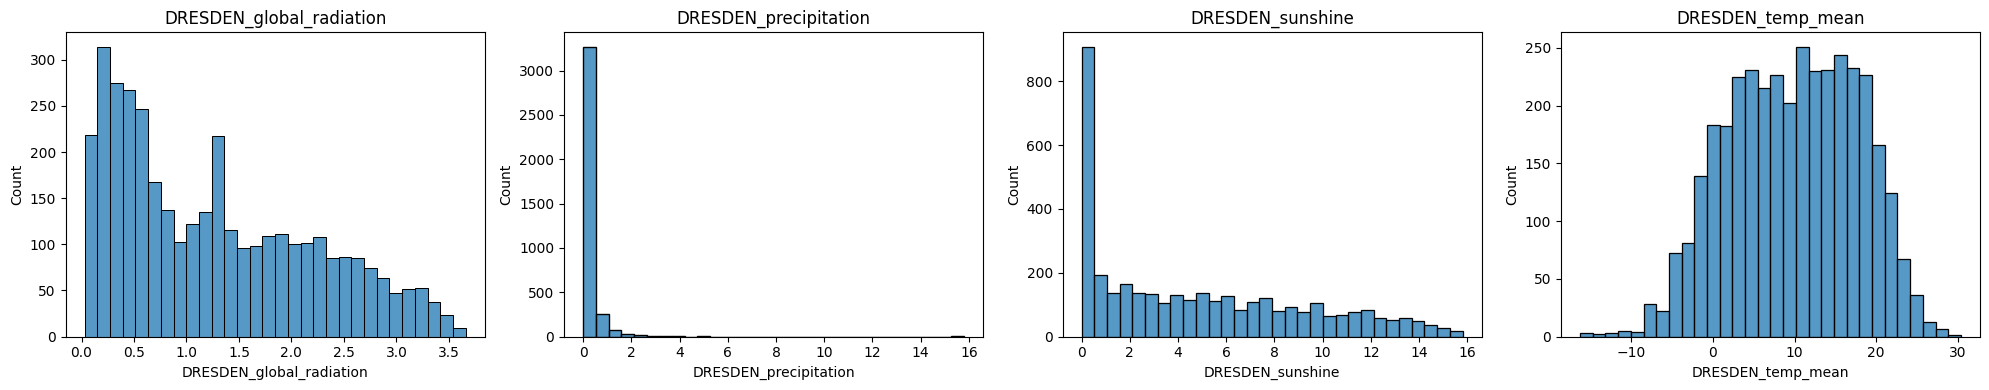

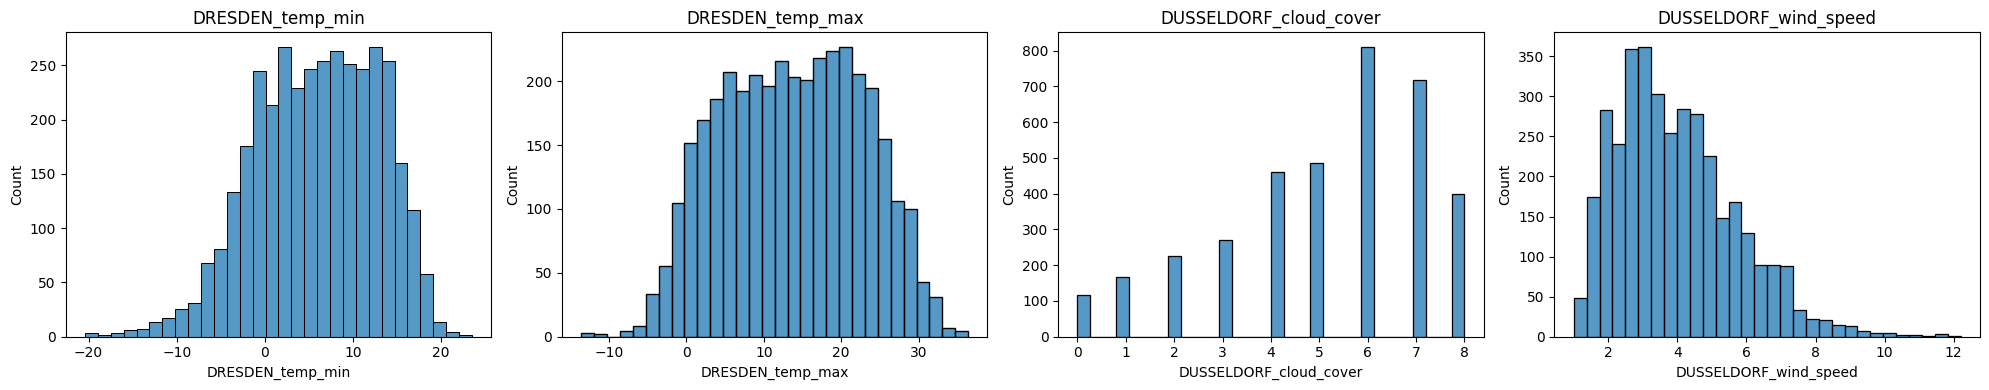

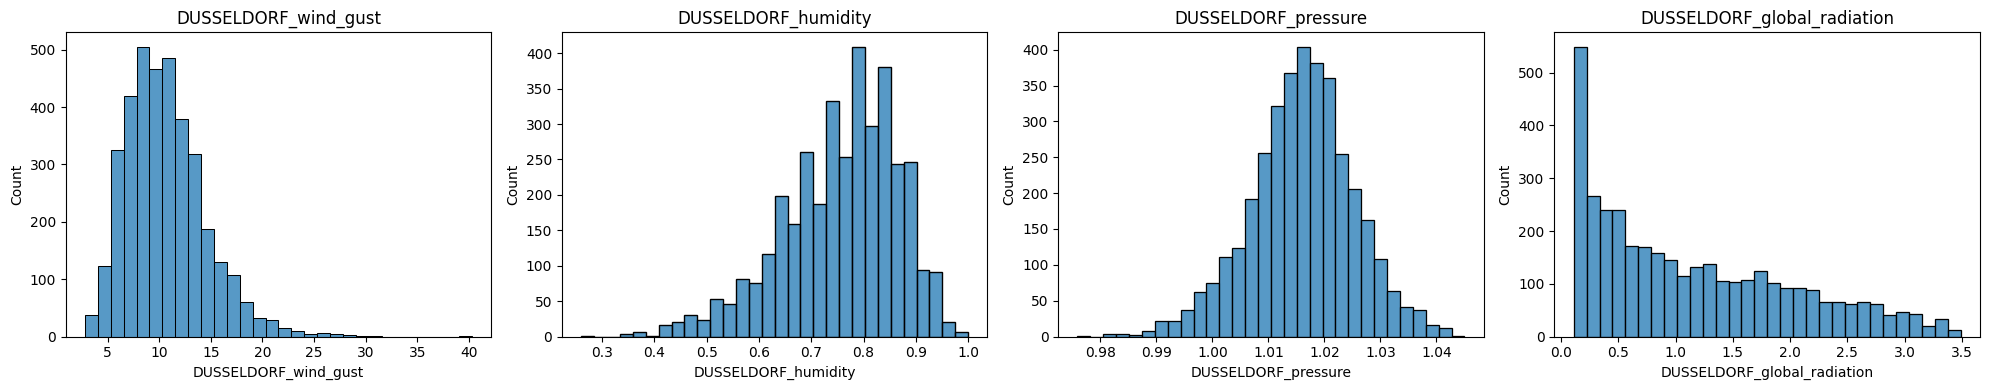

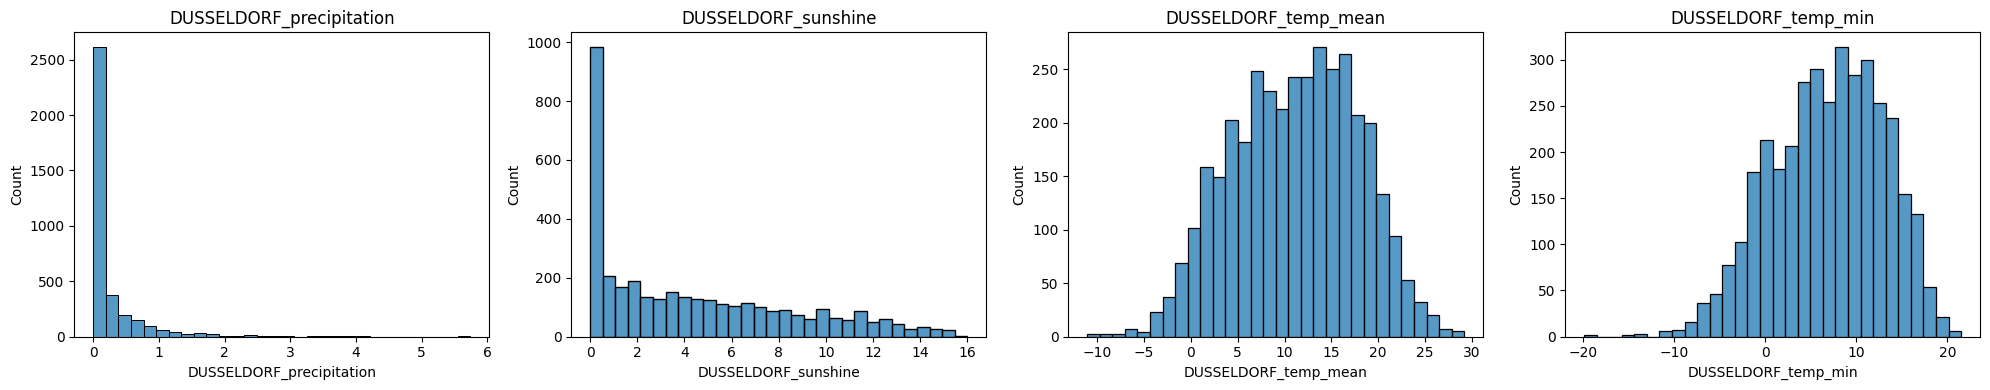

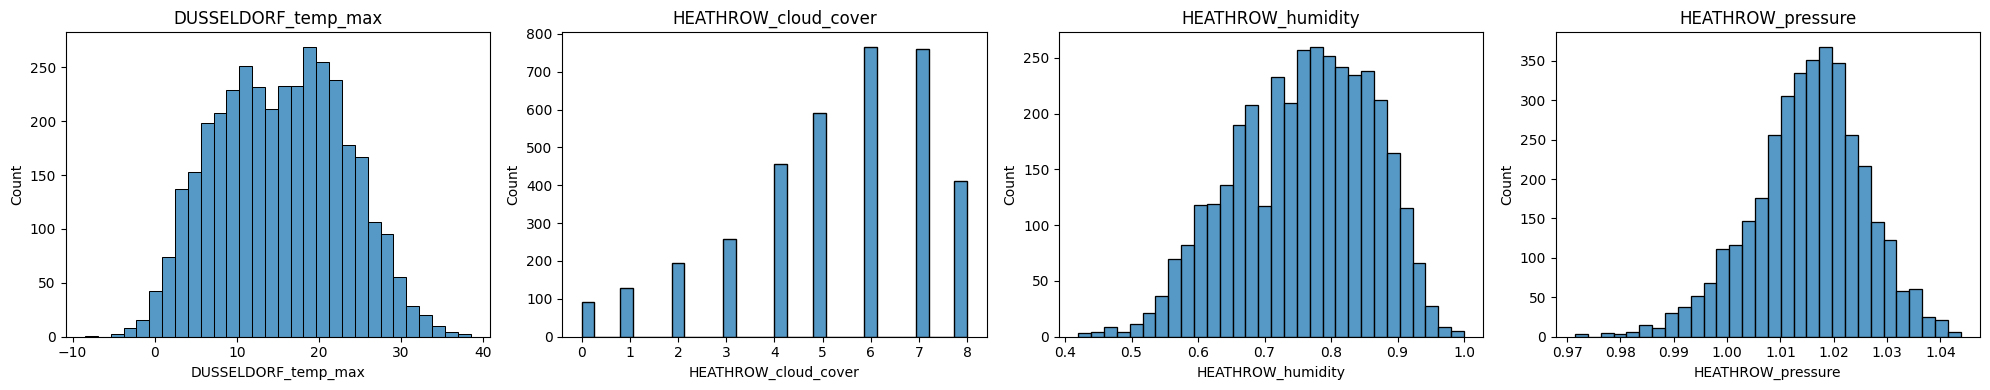

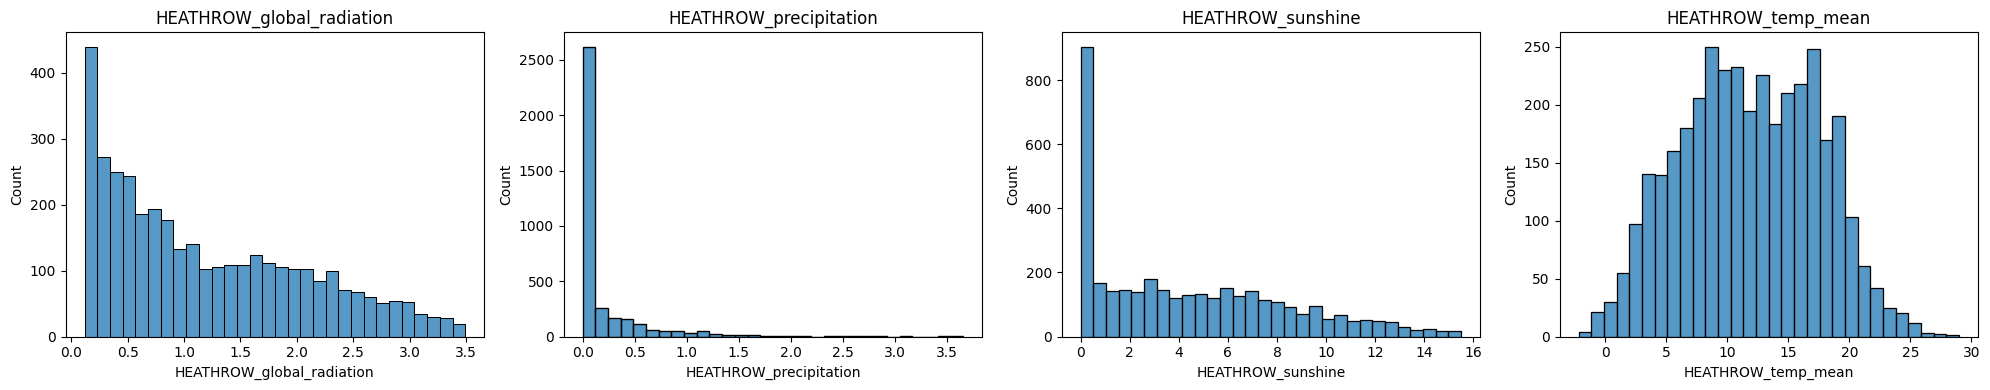

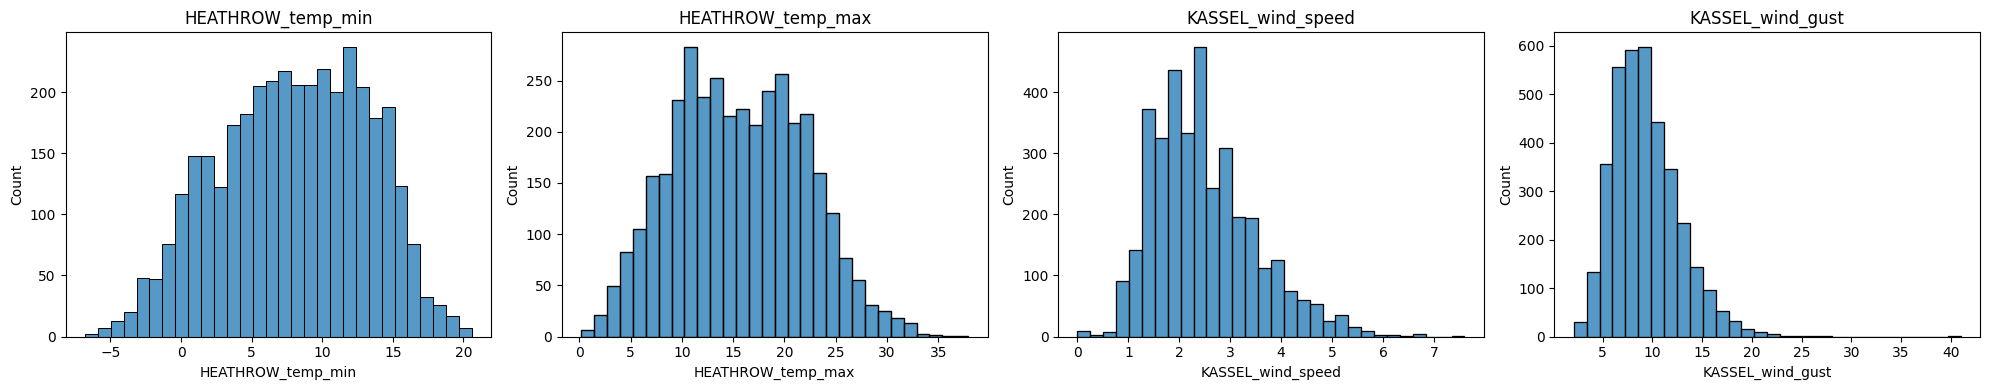

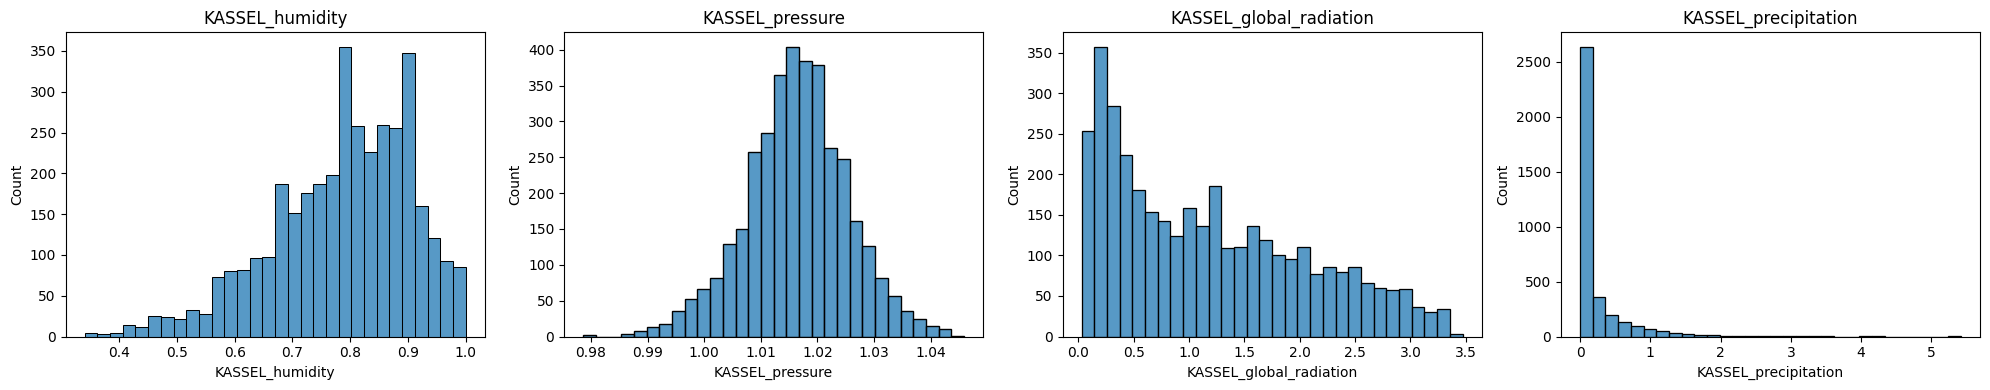

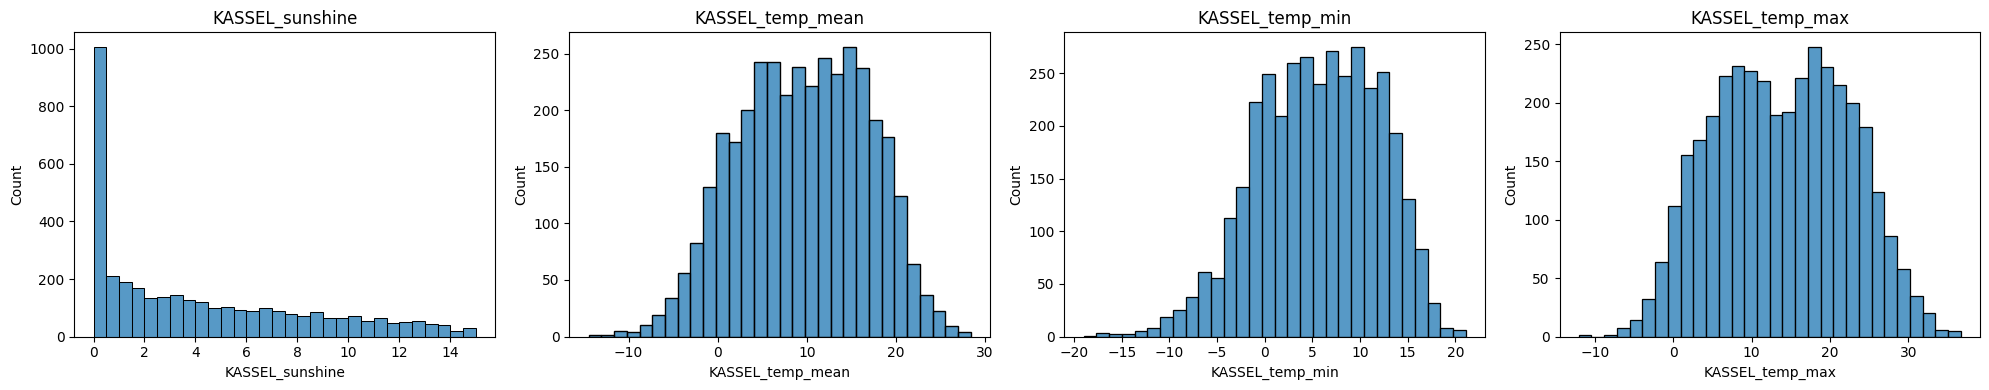

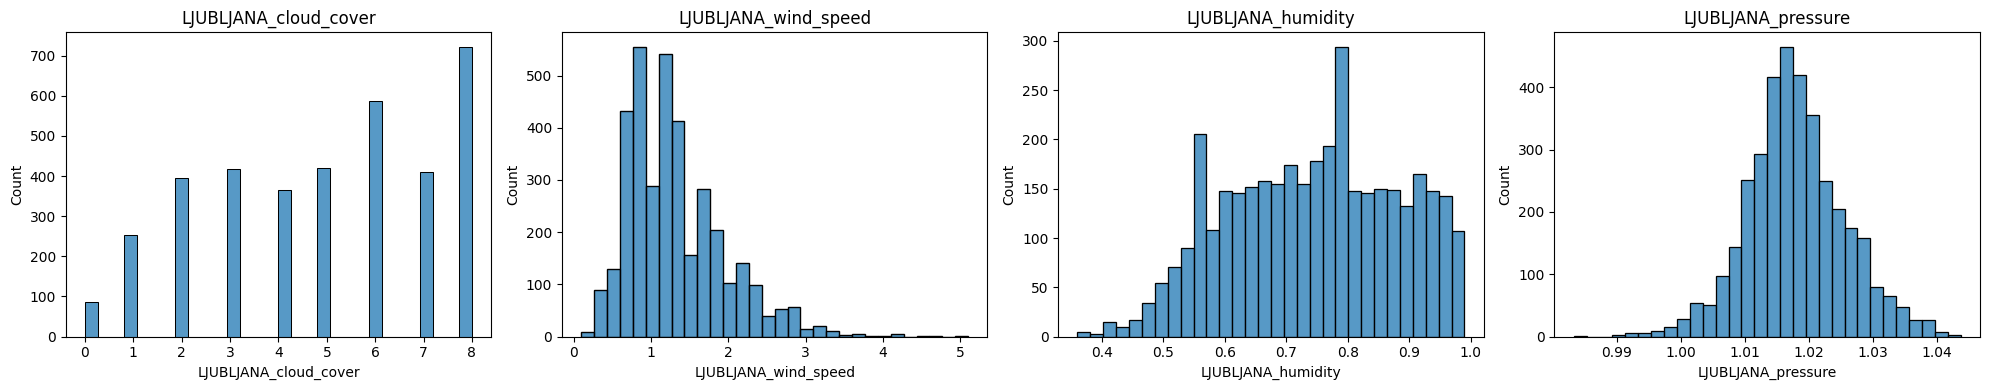

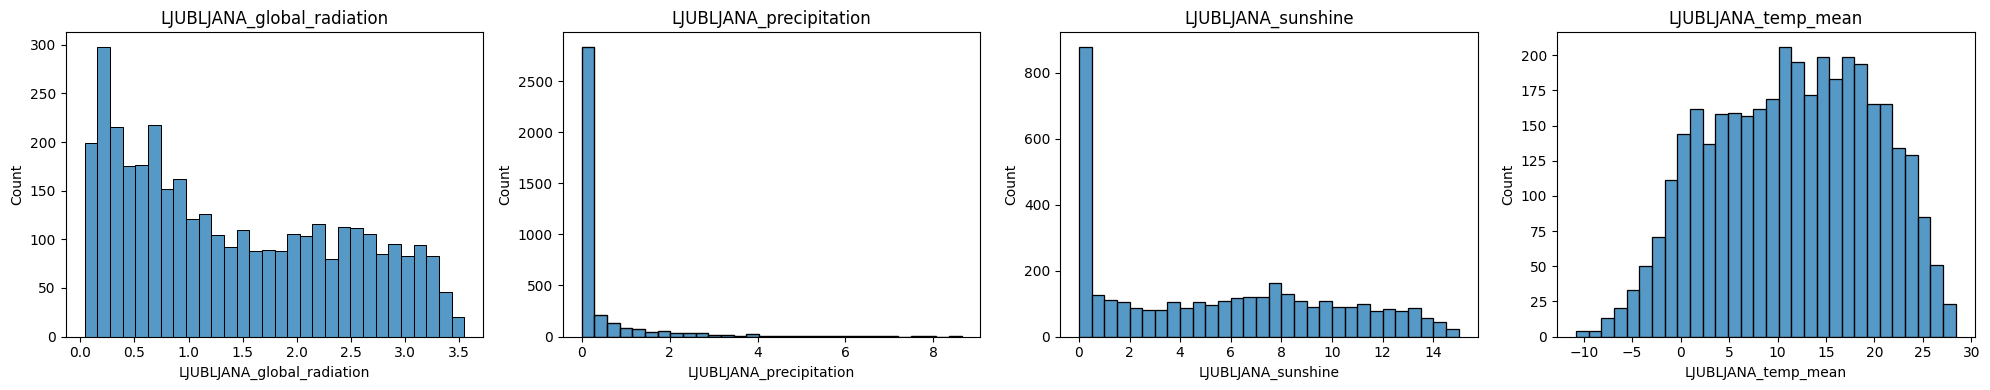

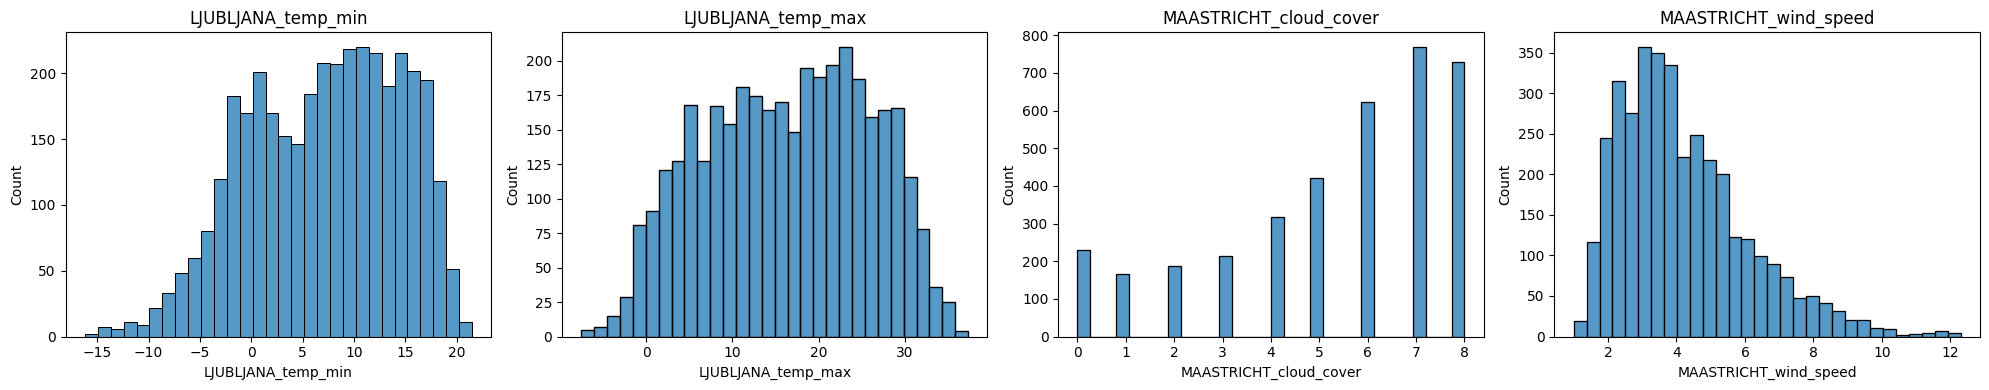

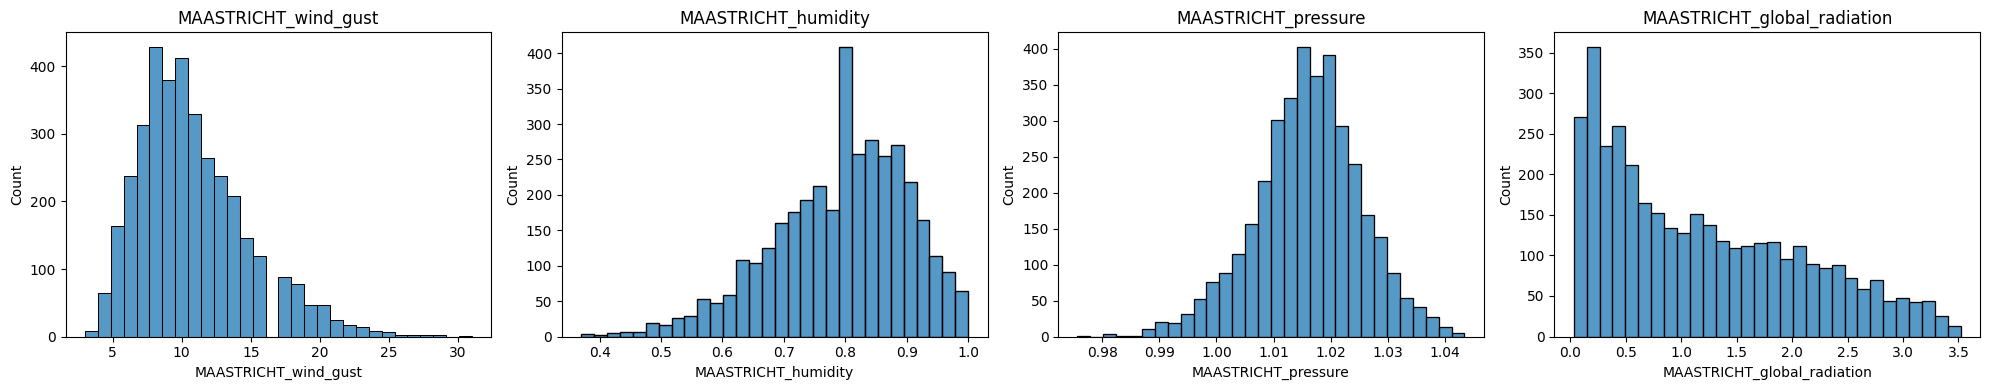

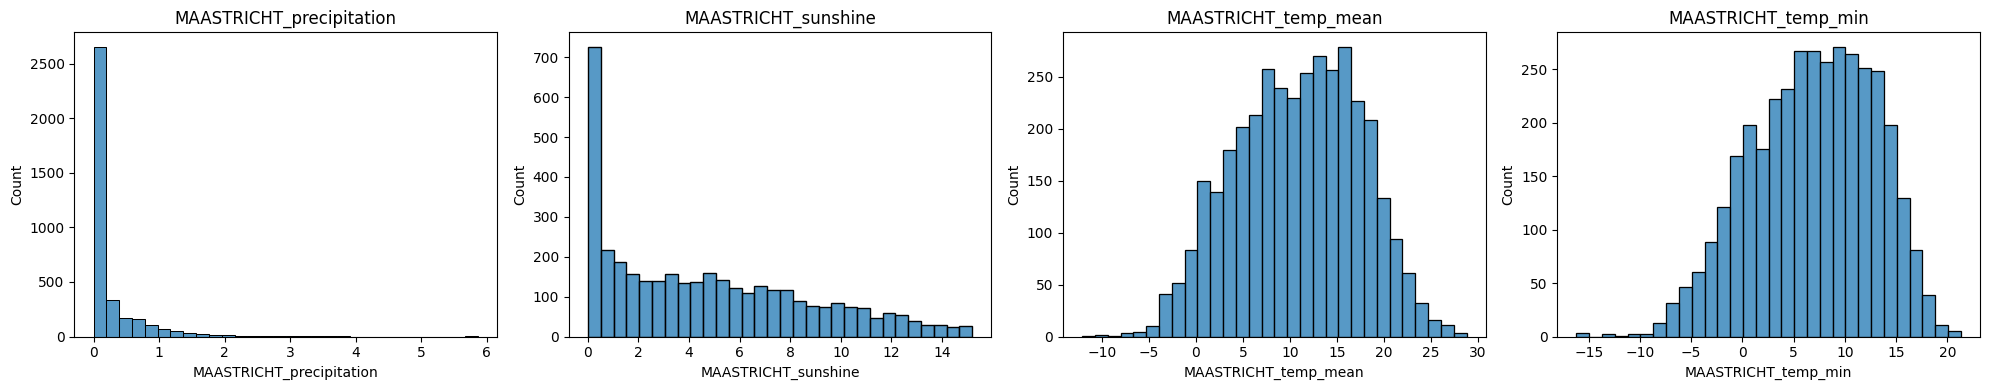

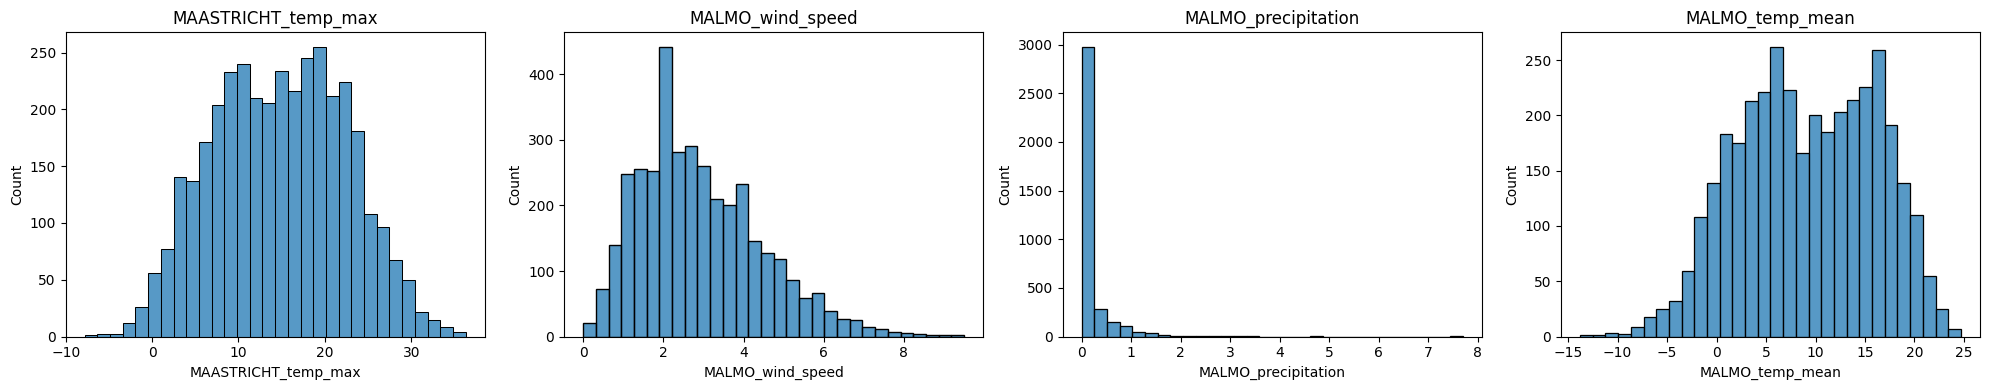

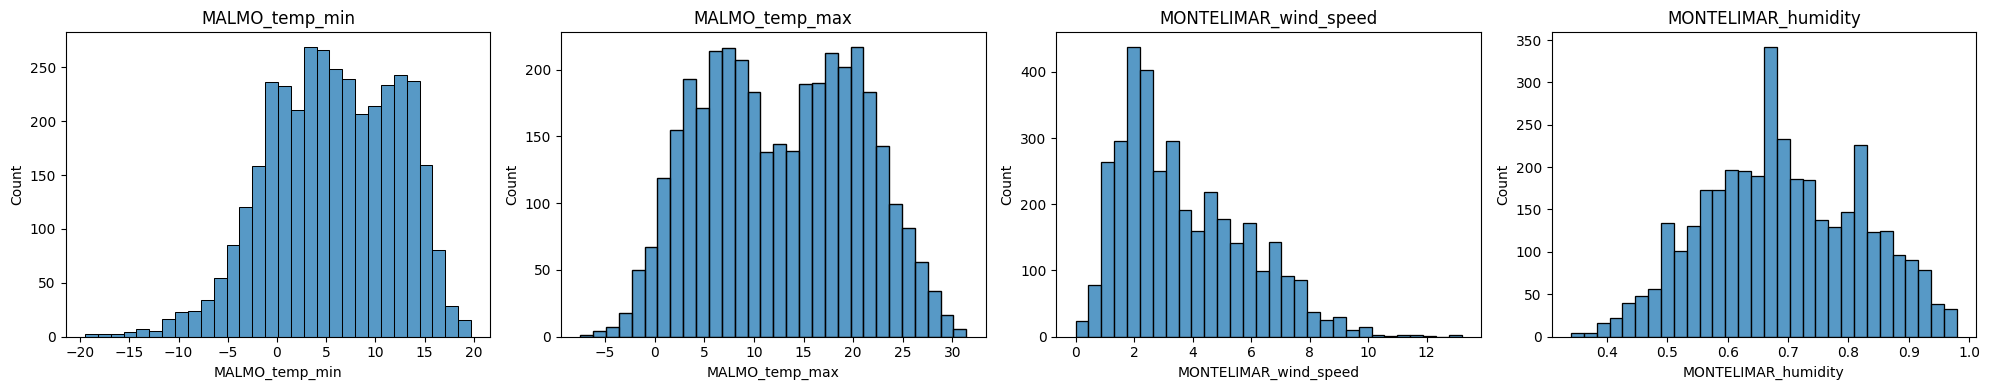

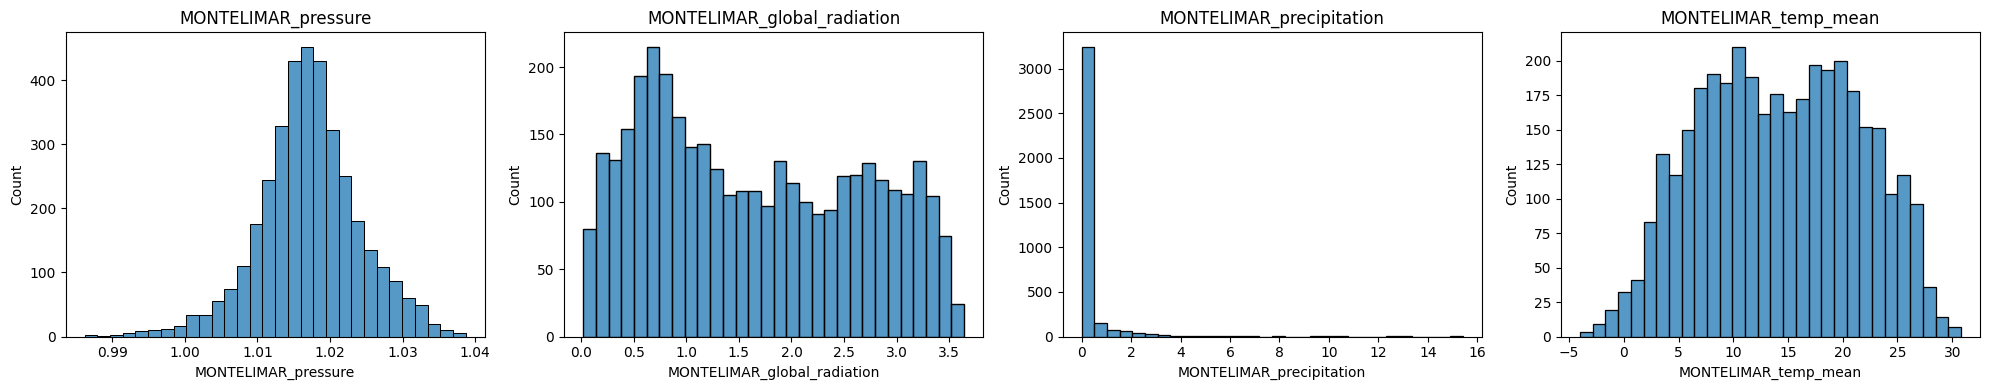

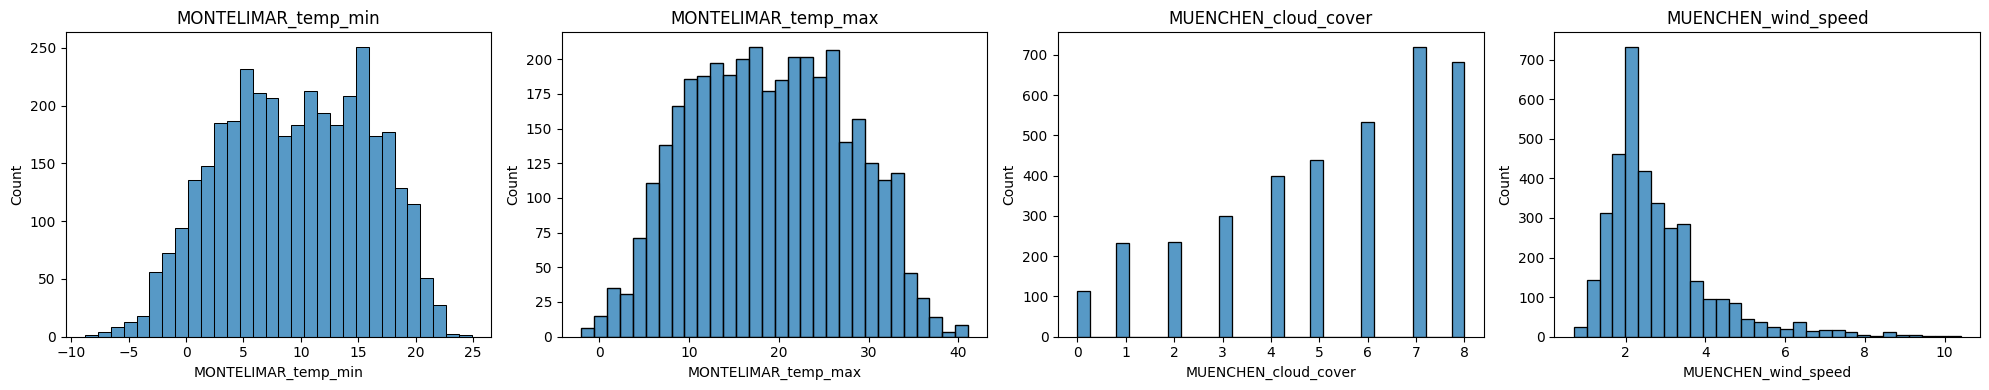

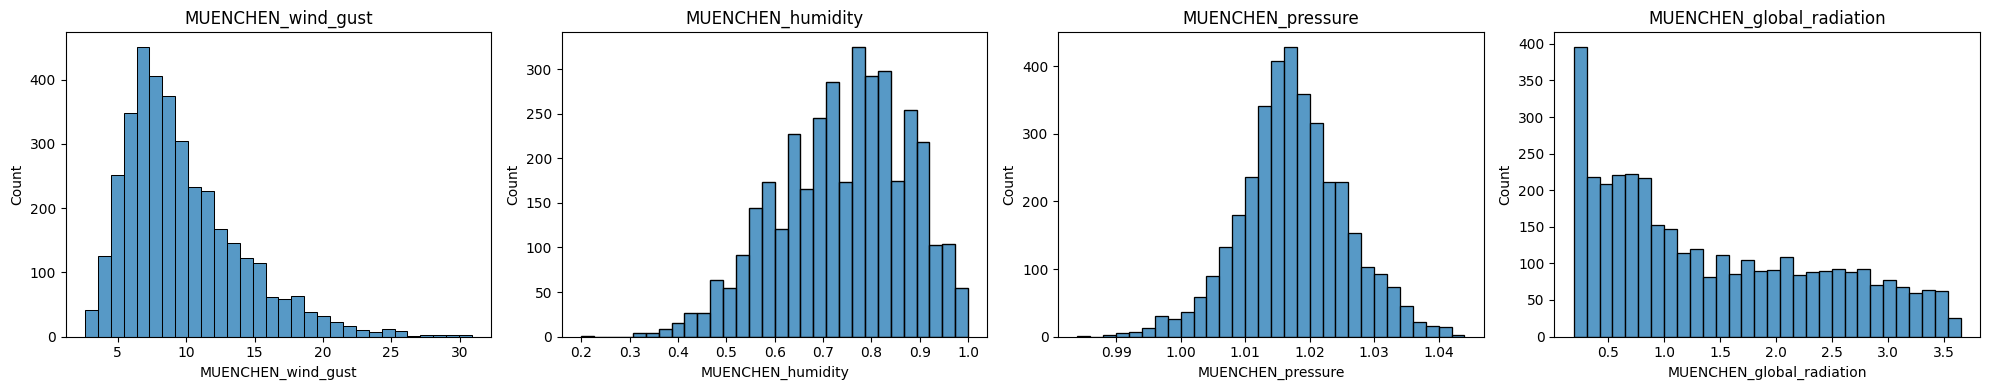

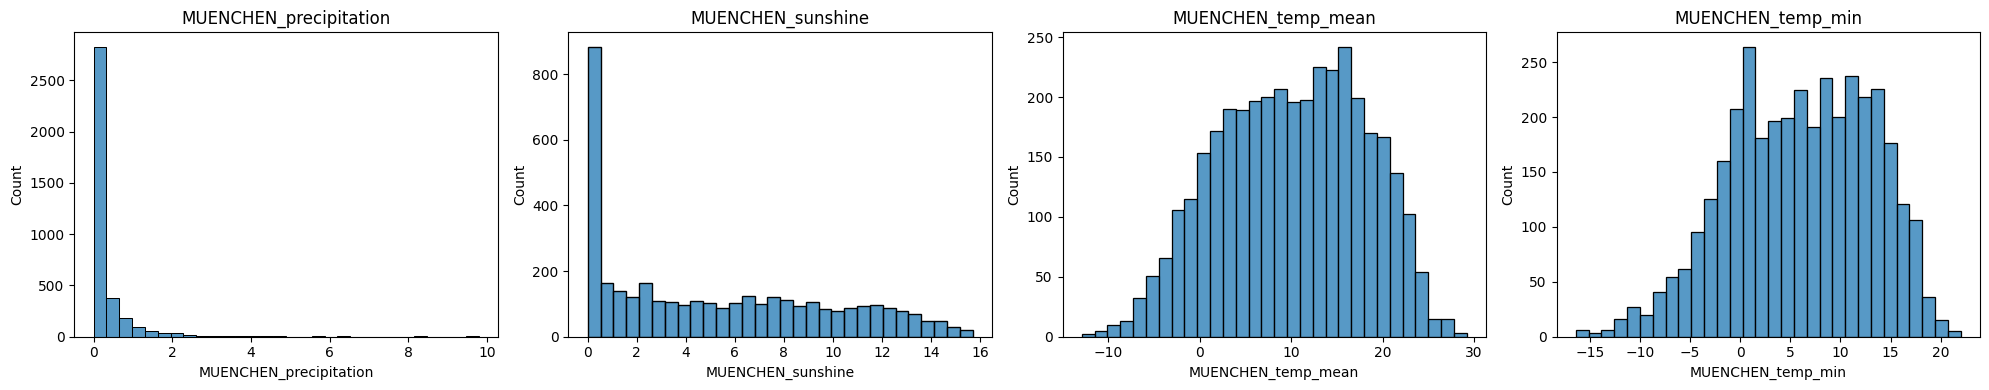

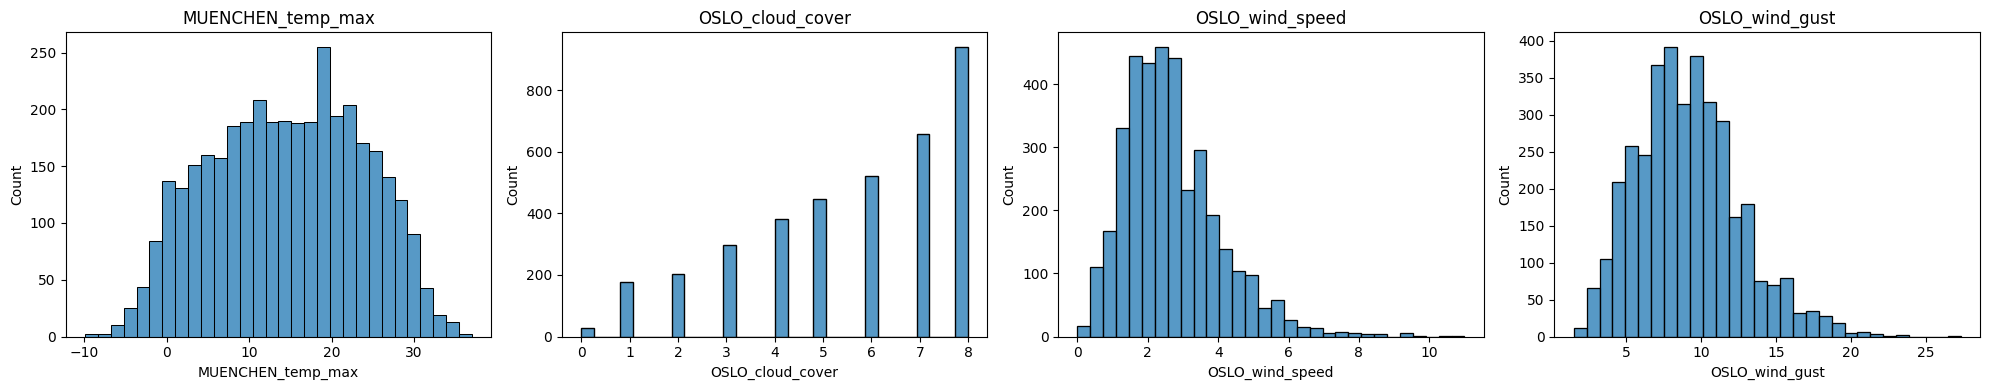

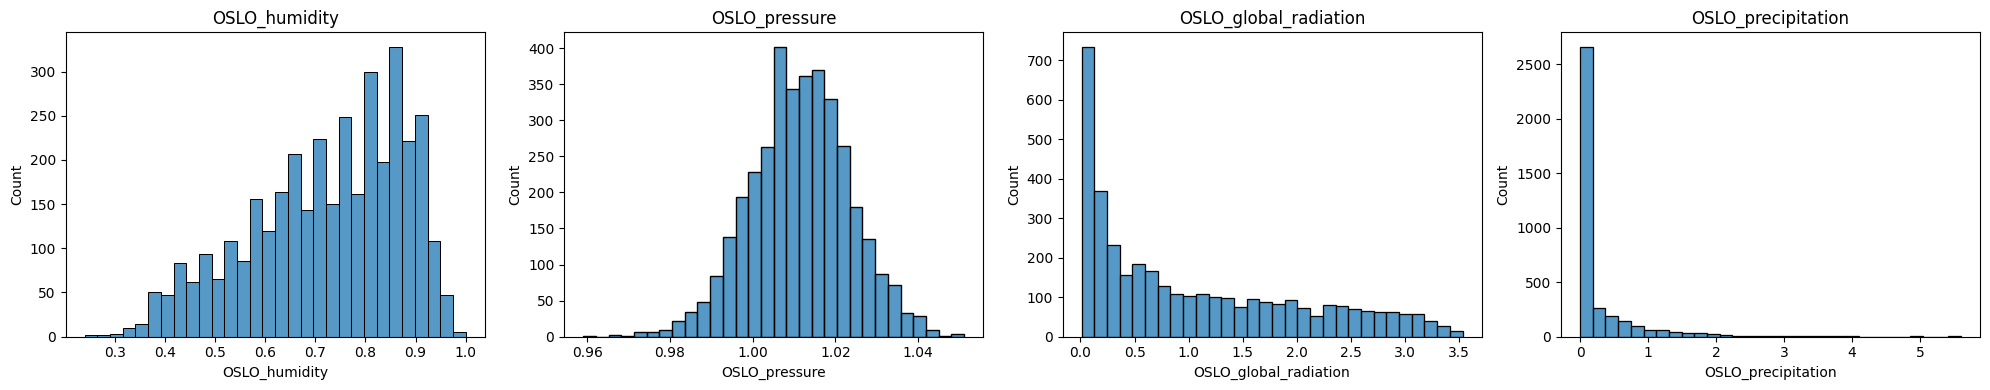

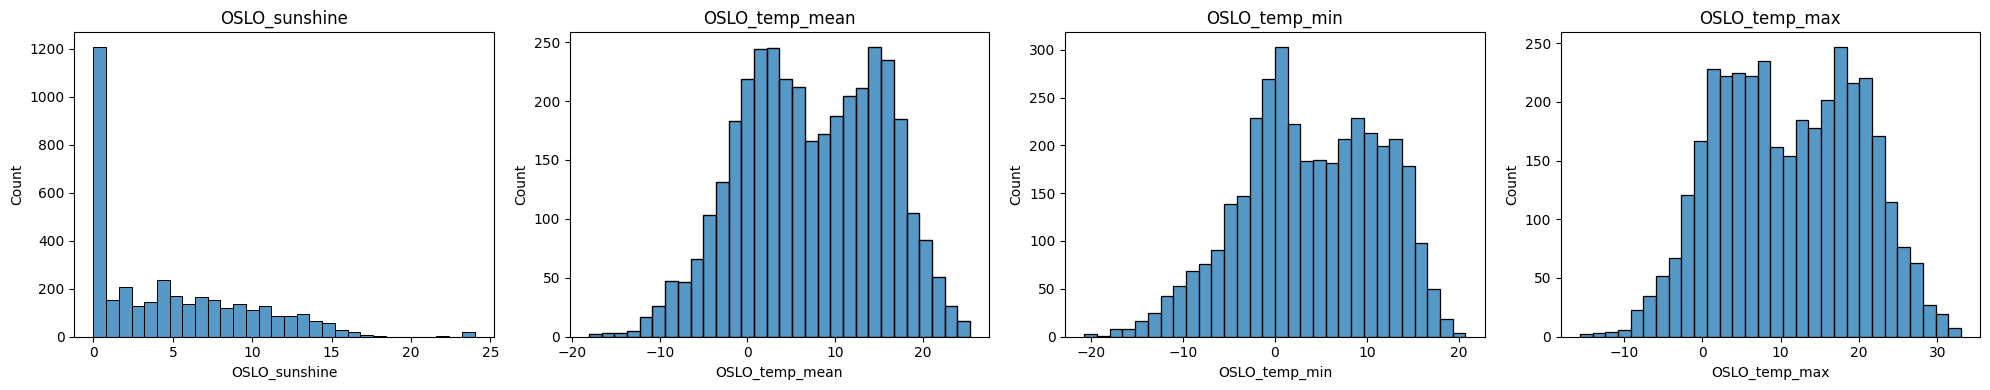

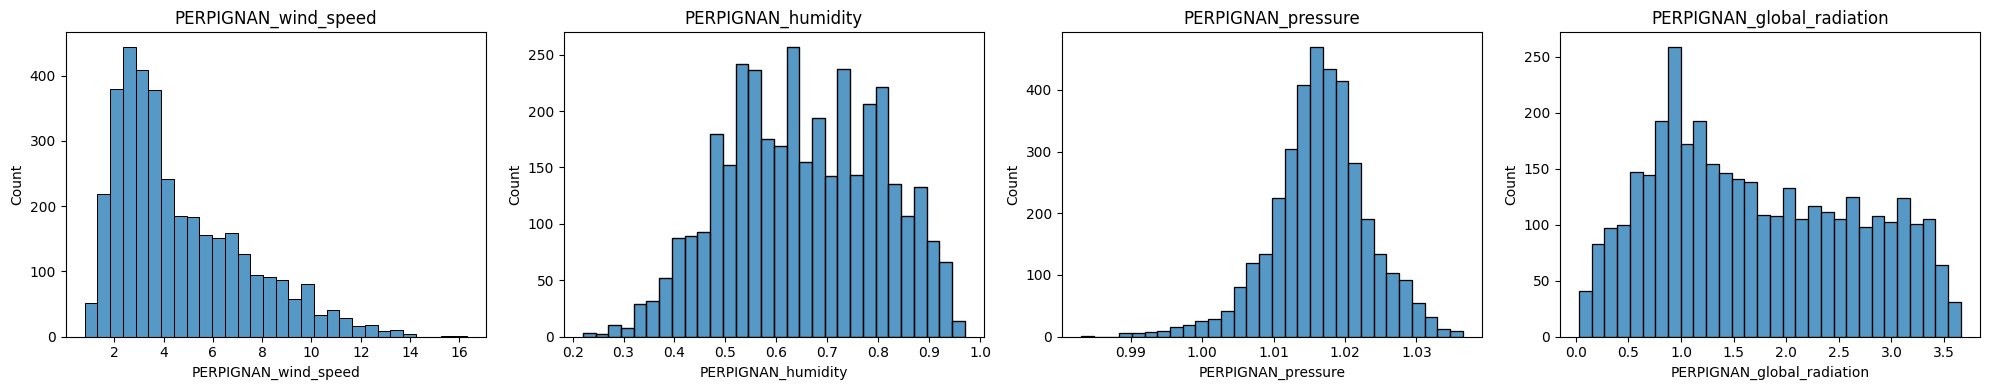

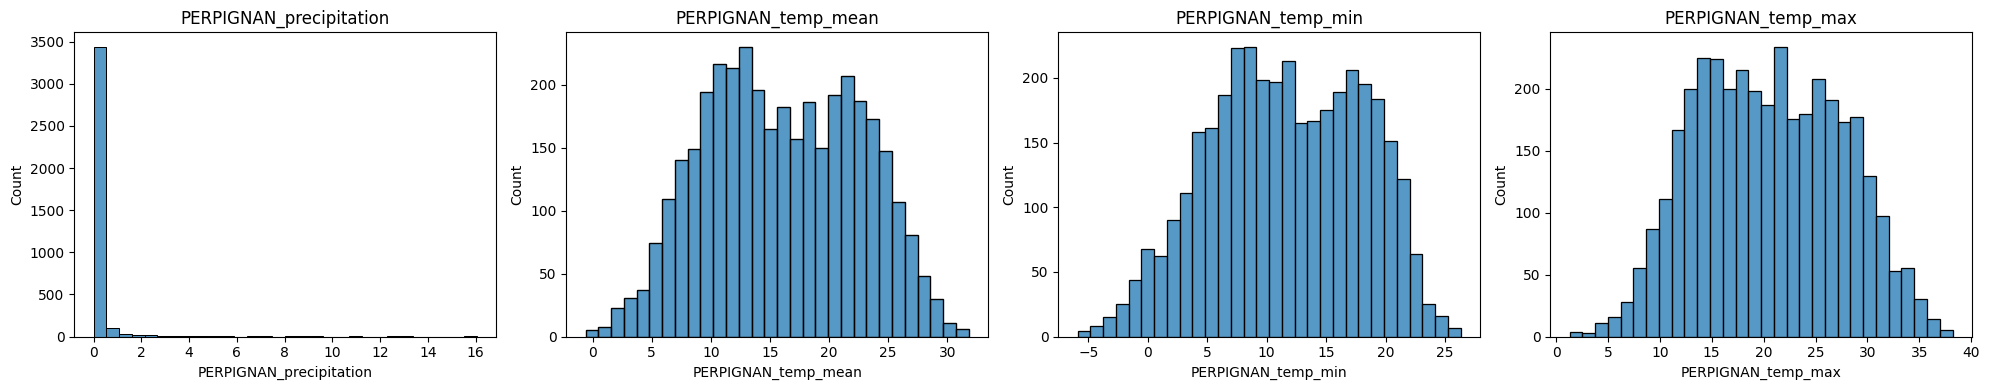

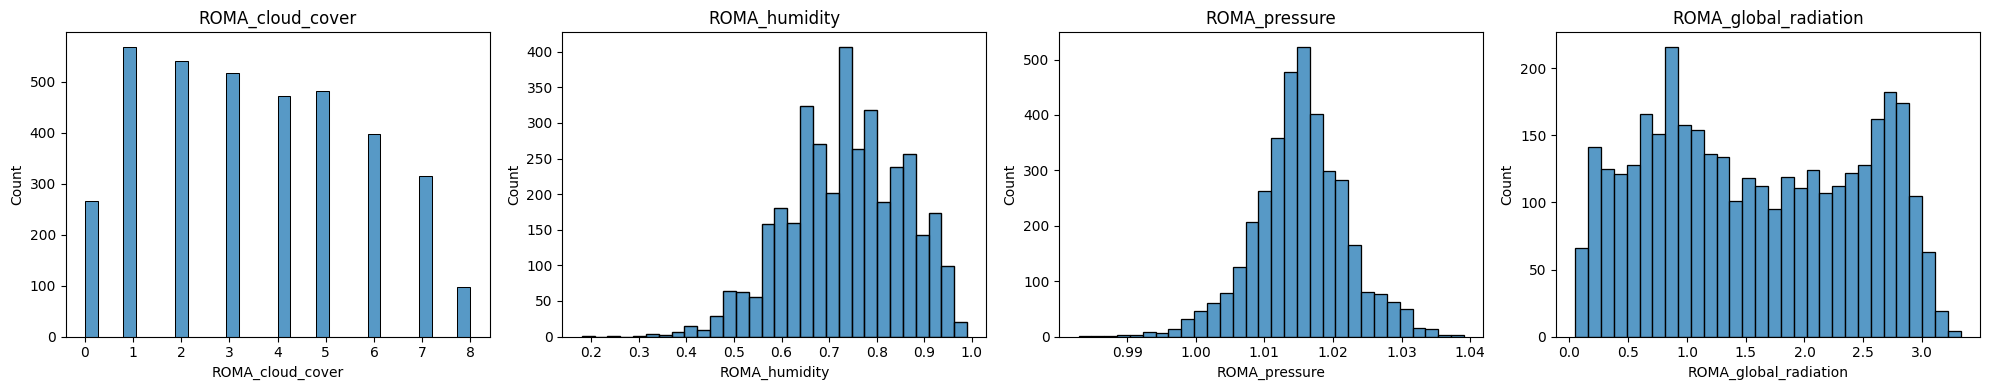

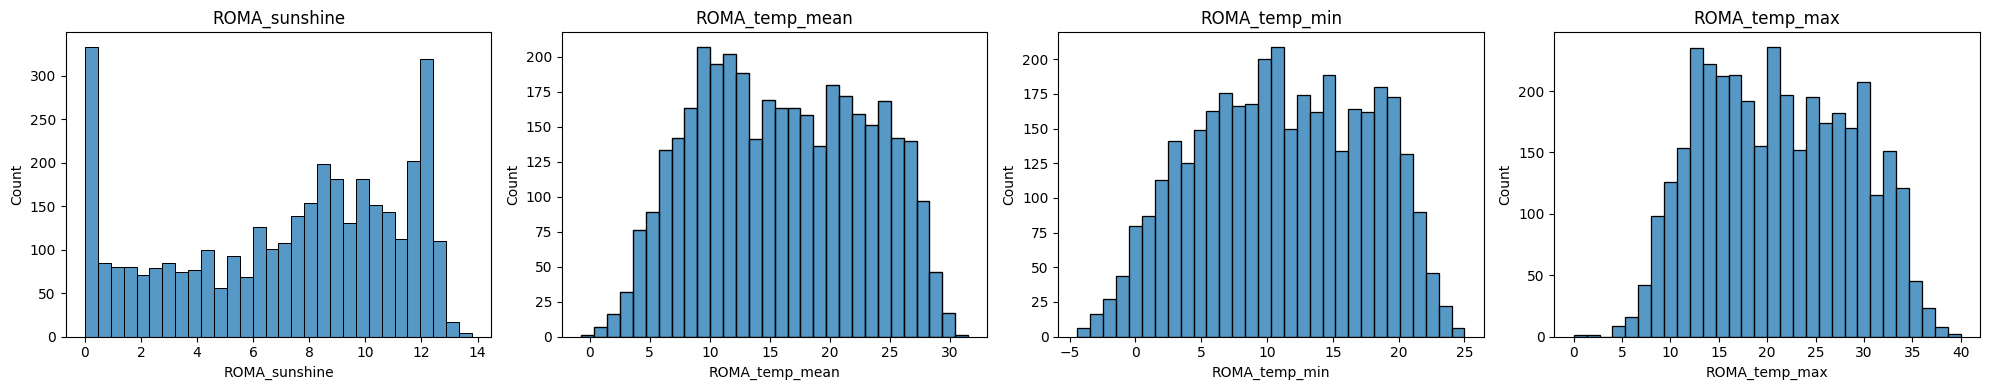

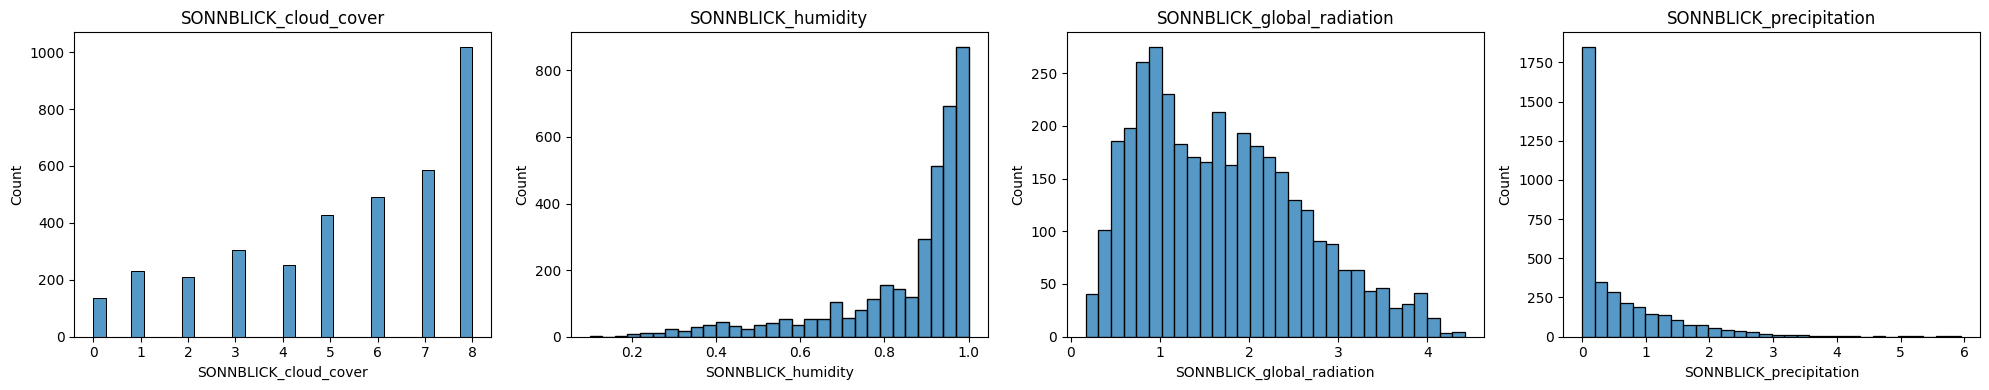

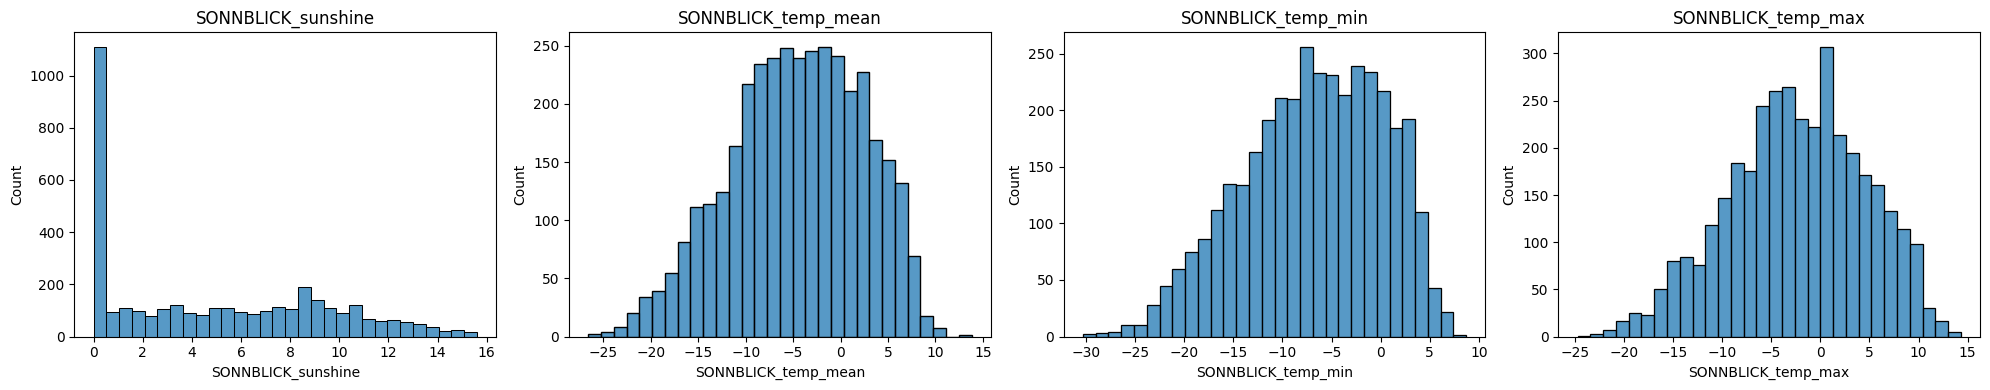

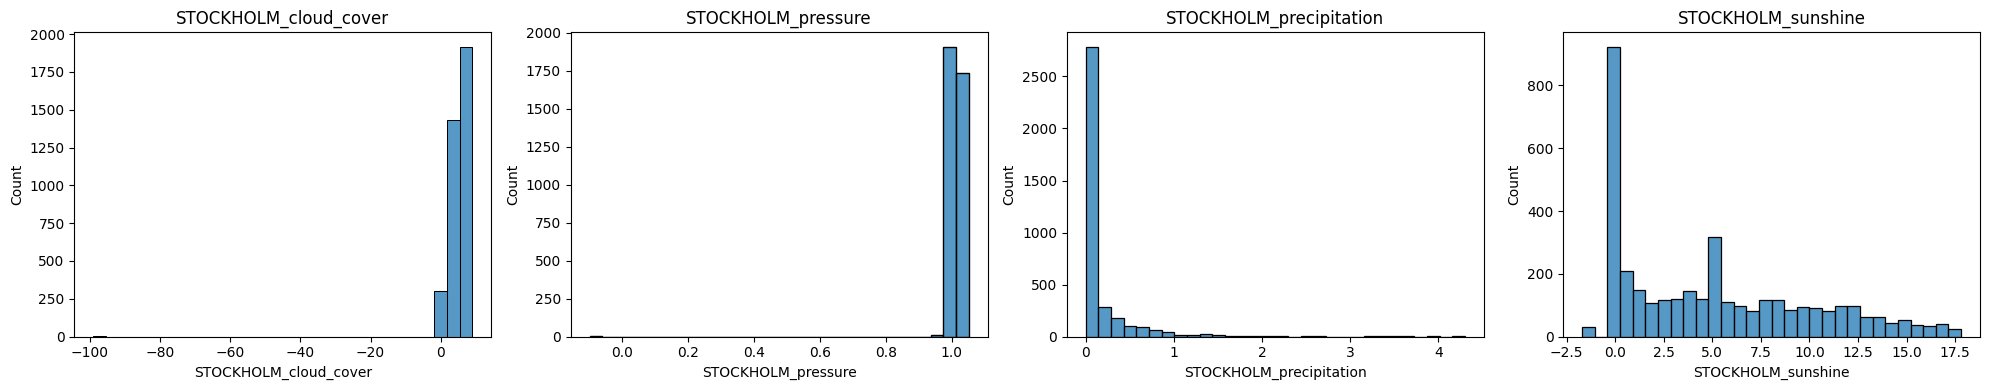

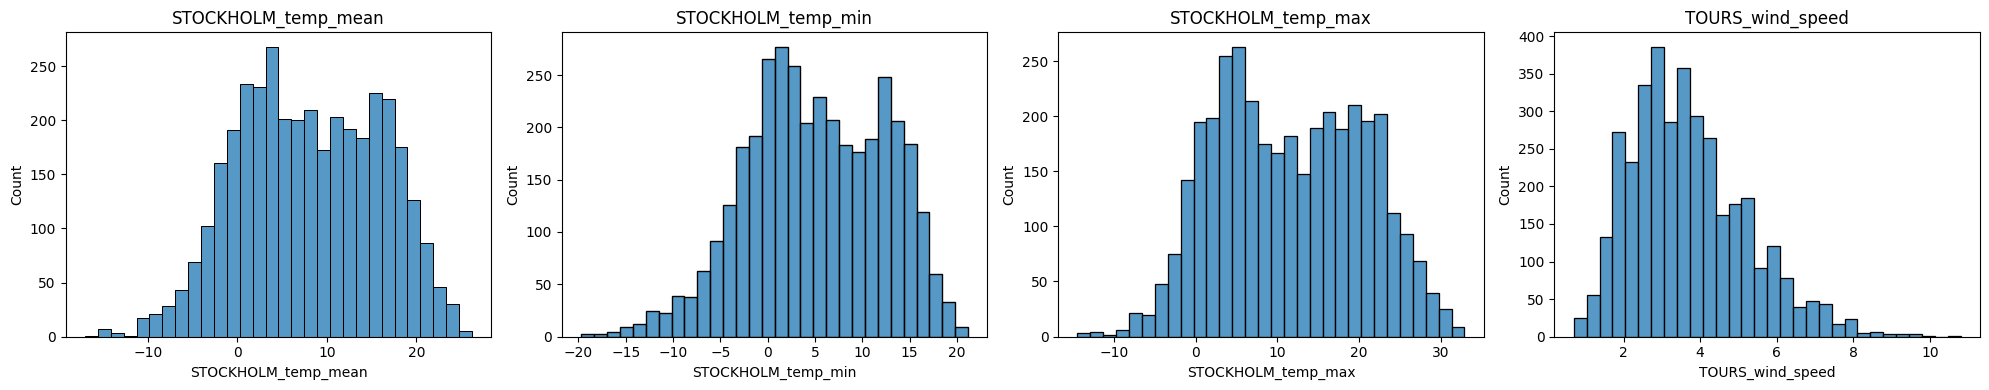

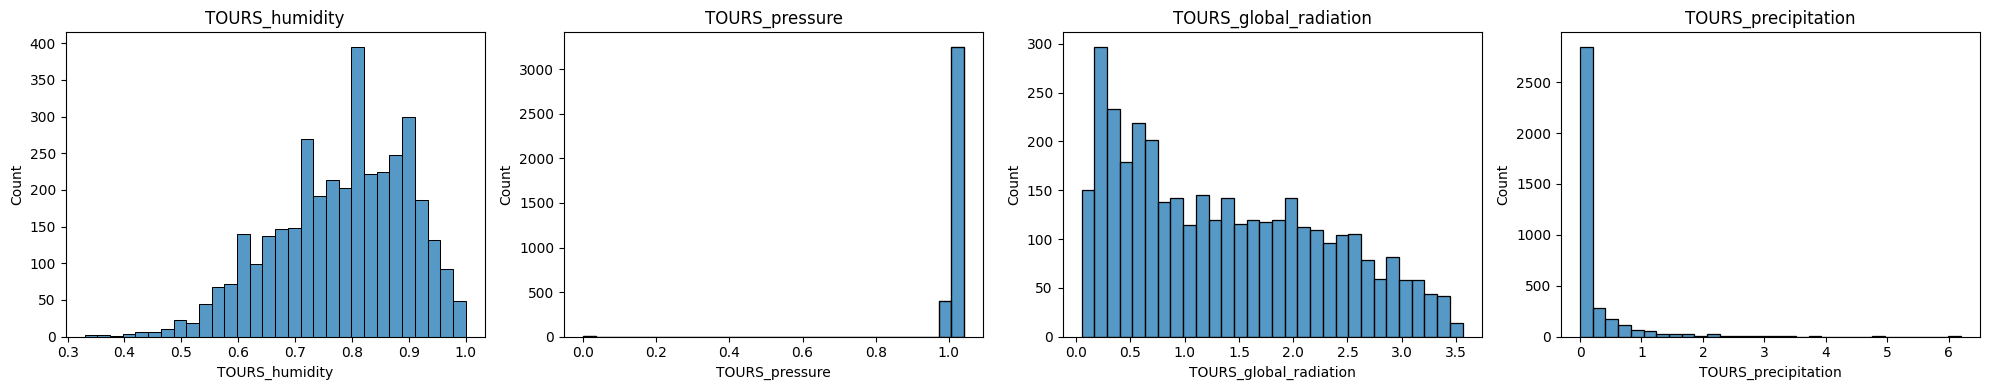

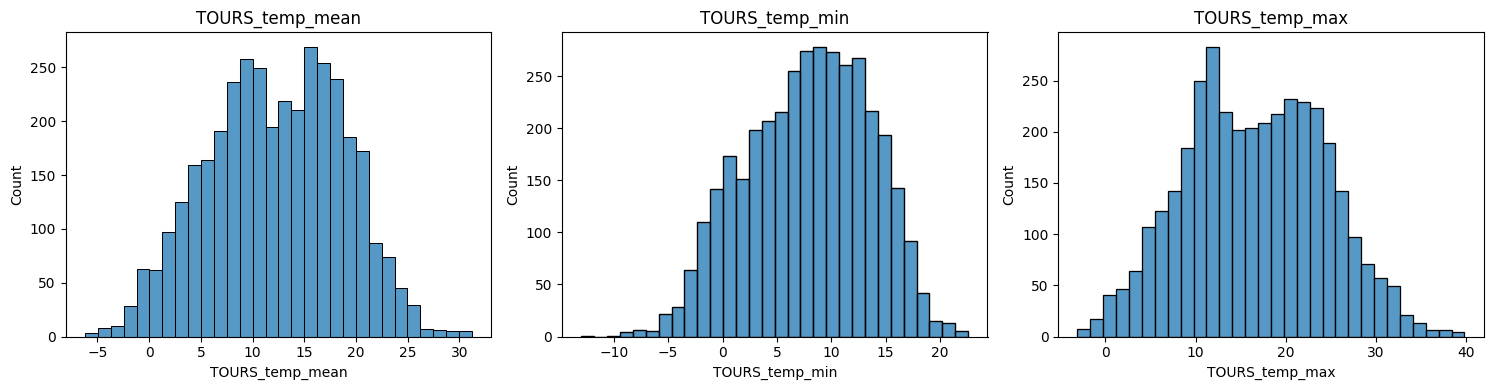

In [11]:
# Exclude unwanted columns
exclude_cols = ['DATE', 'MONTH']
plot_cols = [col for col in df.columns if col not in exclude_cols]

# Set how many plots per row
batch_size = 4

for i in range(0, len(plot_cols), batch_size):
    subset = plot_cols[i:i+batch_size]
    plt.figure(figsize=(5 * batch_size, 4))

    for j, col in enumerate(subset, 1):
        plt.subplot(1, batch_size, j)
        sns.histplot(df[col], bins=30, kde=False)
        plt.title(col)
        plt.tight_layout()

    plt.show()


**Monthly Analysis of  weather Parameters across Europe from 2000-2010**

In [12]:
df_analysis = df.drop(columns=['DATE'])
monthly_trends = df_analysis.groupby('MONTH').mean()
monthly_trends.head(10)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
MONTH                                                      
1               5.717042        0.795884        1.021849   
2               5.710247        0.745406        1.020389   
3               5.545161        0.695839        1.017205   
4               5.470000        0.670267        1.014466   
5               5.529032        0.705903        1.016182   
6               4.816667        0.687500        1.017304   
7               4.677419        0.690484        1.016189   
8               4.712903        0.723903        1.016139   
9               5.160000        0.771533        1.018517   
10              5.593548        0.814710        1.017818   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
MONTH                                                                
1                    0.437460             0.140257        2.457556   
2                    0.726643             0.147739        3.184806   
3                    1.182710             0.210645        4.169677   
4                    1.701400             0.214067        5.373667   
5                    2.067806             0.324806        5.996452   
6                    2.441333             0.267367        7.548333   
7                    2.282516             0.292032        7.055484   
8                    1.948548             0.314645        6.706774   
9                    1.447933             0.248133        5.395667   
10                   0.895710             0.280645        3.876452   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BUDAPEST_cloud_cover  \
MONTH                                                                          
1             2.036013       -0.758521        4.935048              5.678457   
2             3.538516        0.237809        7.298233              5.169611   
3             6.889355        2.681613       11.514194              5.296774   
4            10.750333        5.753667       16.212667              4.716667   
5            15.160968       10.080323       20.570645              4.377419   
6            18.787000       13.514333       24.442000              4.250000   
7            19.779355       14.811290       25.313548              4.264516   
8            19.394516       14.745806       24.916774              3.922581   
9            15.268000       11.098333       20.440667              4.583333   
10           11.438387        7.858710       15.841935              4.874194   

       ...  STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
MONTH  ...                                                             
1      ...           -2.586817            1.370096          4.170096   
2      ...           -3.177385            1.113074          4.036396   
3      ...           -1.628387            4.345161          4.087097   
4      ...            2.837000           11.303333          3.830333   
5      ...            7.425806           16.776774          3.606129   
6      ...           11.570000           20.941333          3.286000   
7      ...           14.930323           23.429355          3.437419   
8      ...           14.479677           22.217419          3.270323   
9      ...           10.189667           16.962667          3.250667   
10     ...            5.616452           10.263548          3.419355   

       TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
MONTH                                                           
1            0.878553        1.019941                0.402605   
2            0.828693        1.019271                0.703392   
3            0.775032        1.016519                1.233032   
4            0.732533        1.013962                1.785700   
5            0.757935        1.015838                2.105355   
6            0.697133        1.017371                2.540900   
7            0.684097        1.016125                2.332323   
8            0.696194        1.016

In [13]:
allowed_weather_types = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation',
    'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]
weather_columns = {}
for col in monthly_trends.columns:
    try:
        city, weather = col.split('_', 1)  # Split into city, weather
        if weather in allowed_weather_types:
            if weather not in weather_columns:
                weather_columns[weather] = []
            weather_columns[weather].append(col)
    except ValueError:
        continue


europe_monthly_trends = {}

for weather_type, cols in weather_columns.items():
    europe_monthly_trends[weather_type] = monthly_trends[cols].mean(axis=1)

europe_monthly_trends_df = pd.DataFrame(europe_monthly_trends)
europe_monthly_trends_df['humidity'] = europe_monthly_trends_df['humidity'] * 100


europe_monthly_trends_df.head()

cloud_cover   humidity  pressure  global_radiation  precipitation  \
MONTH                                                                      
1         5.562433  80.760772  1.017874          0.442932       0.196085   
2         5.423145  76.931684  1.017648          0.754094       0.193085   
3         5.363710  73.044301  1.015203          1.231454       0.200823   
4         4.965833  69.353111  1.014067          1.801053       0.202369   
5         4.884677  69.458280  1.015206          2.235574       0.235552   

       sunshine  temp_mean  temp_min   temp_max  
MONTH                                            
1      2.478234   1.835767 -0.934566   4.678267  
2      3.355015   2.678009 -0.497217   6.028310  
3      4.436055   5.428520  1.472218   9.513321  
4      6.050590   9.610961  4.761979  14.393941  
5      7.206501  14.068824  8.917218  19.061841

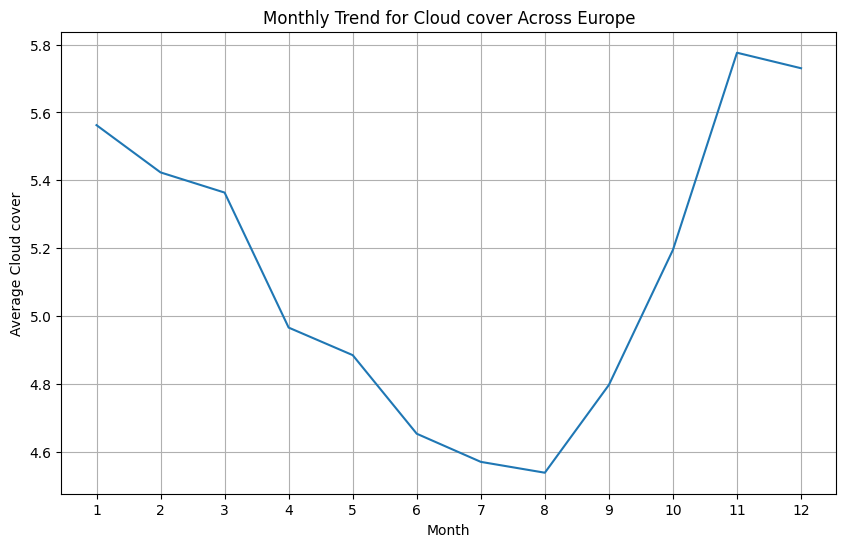

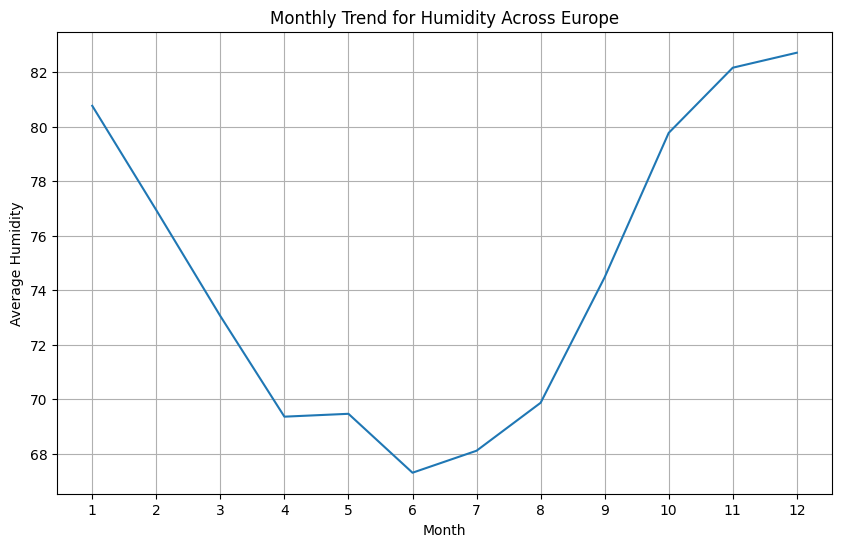

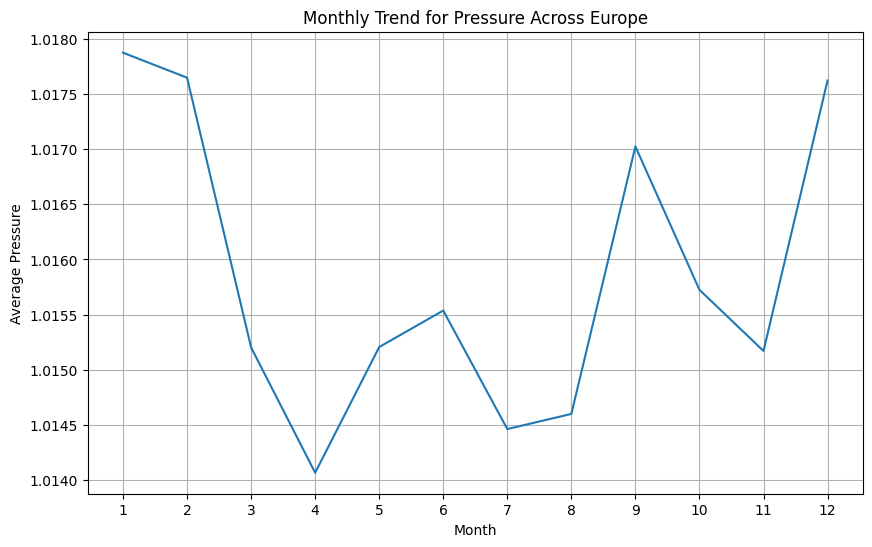

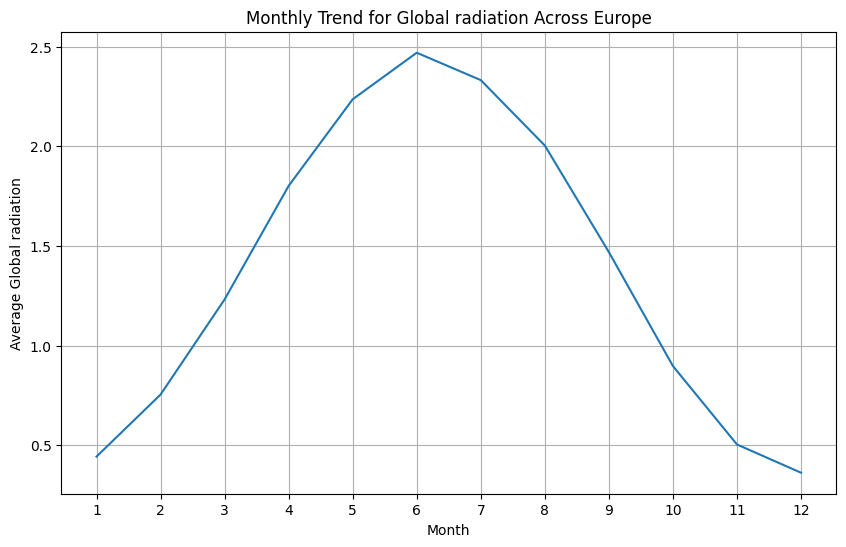

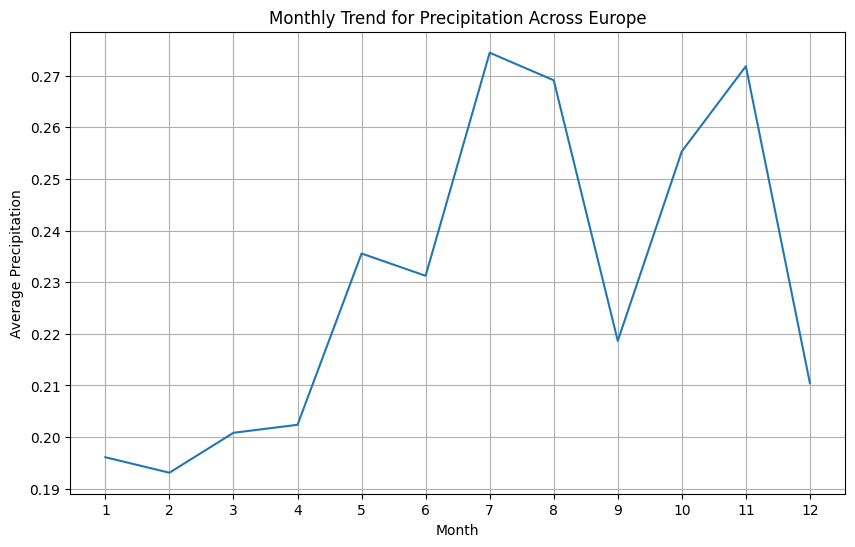

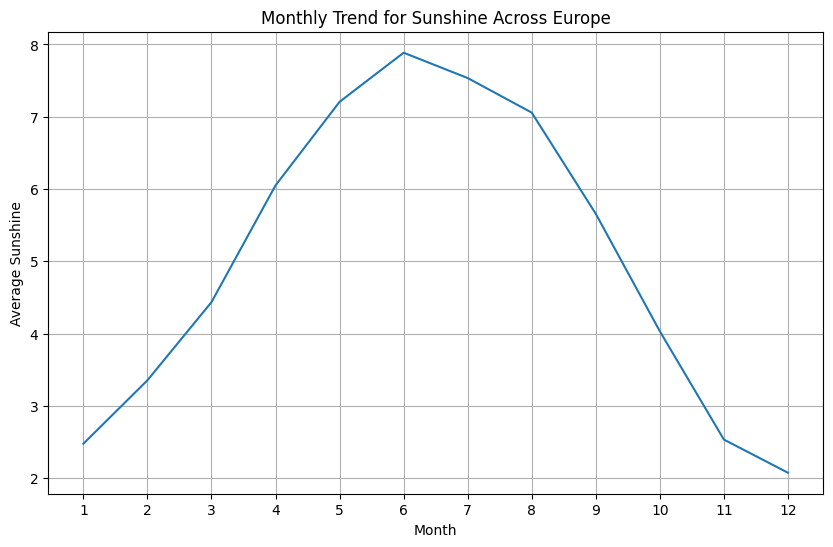

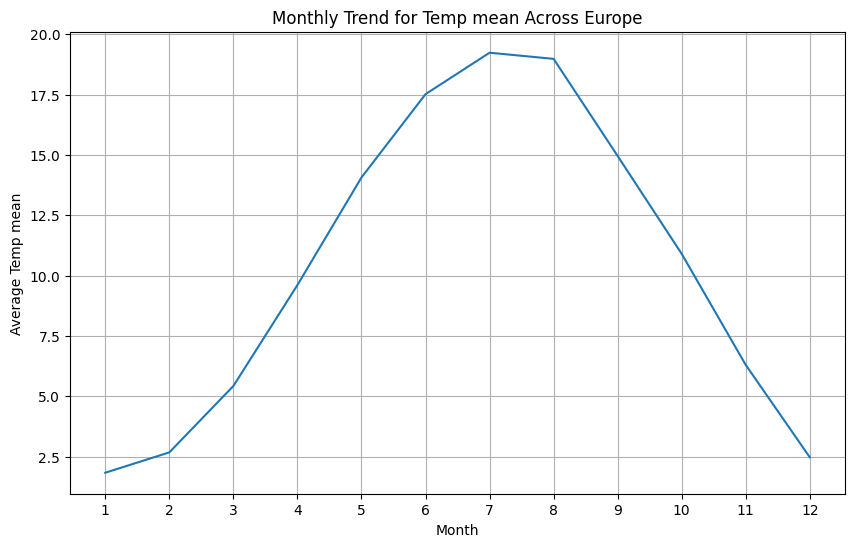

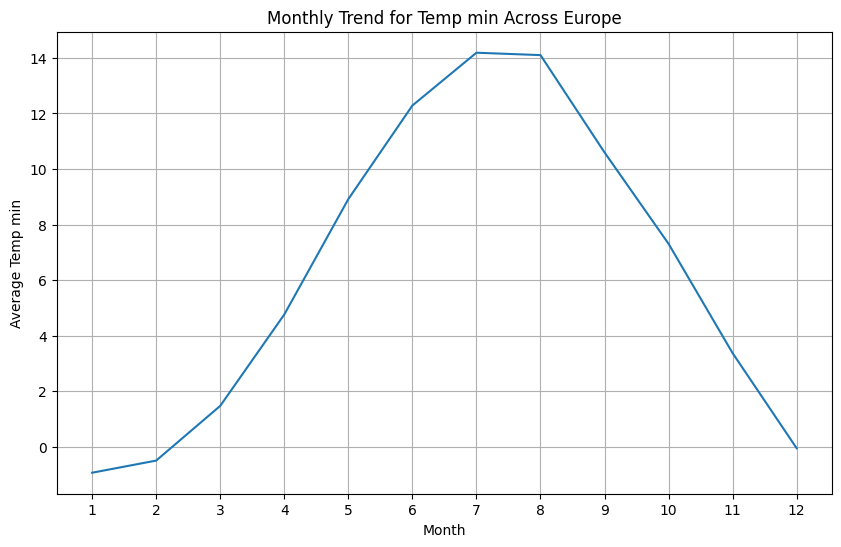

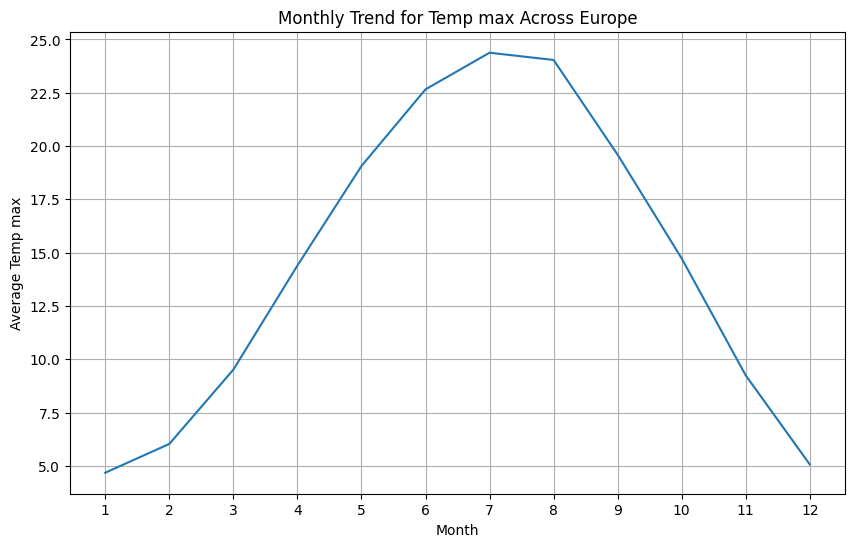

In [14]:
for col in europe_monthly_trends_df.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=europe_monthly_trends_df.index, y=europe_monthly_trends_df[col])
    plt.title(f'Monthly Trend for {col.replace("_", " ").capitalize()} Across Europe')
    plt.xlabel('Month')
    plt.ylabel(f'Average {col.replace("_", " ").capitalize()}')
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()


1. Cloud Cover:
Cloud cover shows a clear declining trend from January to August, reaching its lowest point below 4.6 oktas in August. The values then increase steadily from September to November, peaking at around 5.8 oktas.

2. Humidity:
Humidity exhibits a gradual decline from January through June, with a slight plateau during the early summer months. The lowest average humidity is observed in June, dropping just below 68%. From July onward, humidity values begin to rise steadily, reaching a peak of over 82% in December.

3. Pressure:
Atmospheric pressure across Europe displays an irregular pattern, with frequent crests and troughs observed throughout the year. No strong seasonal trend is evident. The highest average pressure reaches approximately 1018.0 hPa, while the lowest dips to around 1014.0 hPa.

4. Global Radiation:
Global radiation follows a distinct bell-shaped curve, rising steadily from January and peaking in June. The peak value reaches approximately 250 W/m², after which radiation levels decline through the remainder of the year.

5. Precipitation:
Precipitation patterns across Europe appear erratic, with relatively low levels recorded during the first four months of the year. The lowest average occurs between 1.9 mm and 2.0 mm, while the highest reaches slightly above 2.7 mm. From May onward, the values fluctuate without showing a consistent seasonal pattern.


6. Sunshine Duration:
Sunshine also follows a bell curve, similar to global radiation. It increases from winter months, peaking in June, and then declines through the rest of the year.

7. Temperature (Mean, Min, Max):
All three temperature measures — mean, minimum, and maximum — follow a bell-shaped trend, with all curves peaking in July (Month 7), reflecting the typical European summer season.

**Analysis of weather parameters across 5 cities of Europe by month**

Five cities were selected to capture Europe's regional climate diversity:

Roma (Southern Europe)- Mediterranean climate

Heathrow (Western Europe)- Temperate maritime climate

Budapest (Central Europe)- Continental climate

Oslo (Northern Europe)- Cold, seasonal climate

Basel (Western-Central Europe)- Temperate climate with alpine influence

These cities offer a balanced view of varying weather patterns across the continent.

In [15]:
def extract_city_weather(df, city_name, weather_parameters):
    """
    Extracts and returns a DataFrame for a specific city containing only
    the selected weather parameters, grouped by month (mean).
    """
    city_cols = [f"{city_name}_{param}" for param in weather_parameters if f"{city_name}_{param}" in df.columns]
    if not city_cols:
        print(f"No columns found for city: {city_name}")
        return None

    city_df = df[['MONTH'] + city_cols].copy()
    city_monthly_avg = city_df.groupby('MONTH').mean()
    city_monthly_avg.columns = [col.split('_', 1)[1] for col in city_monthly_avg.columns]

    return city_monthly_avg


In [16]:
weather_parameters = ['cloud_cover', 'humidity', 'pressure', 'global_radiation',
                      'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Extract for each selected city
roma_df = extract_city_weather(df, 'ROMA', weather_parameters)
heathrow_df = extract_city_weather(df, 'HEATHROW', weather_parameters)
budapest_df = extract_city_weather(df, 'BUDAPEST', weather_parameters)
oslo_df=extract_city_weather(df,'OSLO',weather_parameters)
basel_df=extract_city_weather(df,'BASEL',weather_parameters)

In [17]:
oslo_df.head()

cloud_cover  humidity  pressure  global_radiation  precipitation  \
MONTH                                                                     
1         6.125402  0.823183  1.008586          0.110932       0.210096   
2         5.671378  0.779541  1.011639          0.351767       0.164134   
3         5.248387  0.695161  1.011299          0.894742       0.121419   
4         5.556667  0.665633  1.013945          1.339333       0.194267   
5         5.225806  0.604677  1.012756          2.032968       0.237323   

       sunshine  temp_mean  temp_min   temp_max  
MONTH                                            
1      1.458521  -1.674598 -4.116720   0.655949  
2      2.922261  -1.940283 -4.626148   1.145230  
3      5.061290   0.865484 -2.673548   5.063226  
4      5.345000   6.474333  2.618333  11.022333  
5      8.011935  11.648710  7.011613  16.863548

In [18]:
basel_df.head()

cloud_cover  humidity  pressure  global_radiation  precipitation  \
MONTH                                                                     
1         5.717042  0.795884  1.021849          0.437460       0.140257   
2         5.710247  0.745406  1.020389          0.726643       0.147739   
3         5.545161  0.695839  1.017205          1.182710       0.210645   
4         5.470000  0.670267  1.014466          1.701400       0.214067   
5         5.529032  0.705903  1.016182          2.067806       0.324806   

       sunshine  temp_mean   temp_min   temp_max  
MONTH                                             
1      2.457556   2.036013  -0.758521   4.935048  
2      3.184806   3.538516   0.237809   7.298233  
3      4.169677   6.889355   2.681613  11.514194  
4      5.373667  10.750333   5.753667  16.212667  
5      5.996452  15.160968  10.080323  20.570645

In [19]:
roma_df.head()

cloud_cover  humidity  pressure  global_radiation  sunshine  temp_mean  \
MONTH                                                                           
1         4.093248  0.791768  1.018108          0.631415  4.198071   7.309003   
2         3.957597  0.754982  1.017028          0.959541  5.361837   8.031449   
3         4.345161  0.748516  1.014522          1.427548  6.055161  10.840968   
4         4.263333  0.746200  1.012707          1.862533  7.054667  13.952000   
5         3.590323  0.709355  1.014576          2.355935  8.855484  18.788710   

        temp_min   temp_max  
MONTH                        
1       3.634727  11.722830  
2       3.751590  12.931802  
3       6.240000  15.859677  
4       9.096000  19.044667  
5      13.354839  24.222903

In [20]:
heathrow_df.head()

cloud_cover  humidity  pressure  global_radiation  precipitation  \
MONTH                                                                     
1         5.636656  0.828424  1.016151          0.320514       0.168489   
2         5.618375  0.789293  1.016978          0.553816       0.170212   
3         5.474194  0.751484  1.014933          1.024161       0.137613   
4         4.906667  0.717200  1.013793          1.633433       0.154200   
5         5.251613  0.709548  1.015153          1.997516       0.177129   

       sunshine  temp_mean  temp_min   temp_max  
MONTH                                            
1      2.207395   5.812219  2.973955   8.686174  
2      2.920495   6.030389  2.925442   9.108834  
3      3.826774   7.826129  4.116452  11.621290  
4      5.569333  10.540333  6.172000  14.919667  
5      6.127097  13.850323  9.420968  18.375161

In [21]:
budapest_df.head()

cloud_cover  humidity  pressure  global_radiation  precipitation  \
MONTH                                                                     
1         5.678457  0.769196  1.020972          0.432958       0.115723   
2         5.169611  0.709717  1.018773          0.808728       0.102544   
3         5.296774  0.635742  1.015377          1.243452       0.122032   
4         4.716667  0.545667  1.014012          1.950733       0.119000   
5         4.377419  0.563935  1.015063          2.478452       0.126258   

       sunshine  temp_mean   temp_max  
MONTH                                  
1      2.399357   0.850161   3.723473  
2      3.681979   2.783039   6.192580  
3      4.487097   6.906774  11.069677  
4      6.894667  13.132000  18.301333  
5      8.698710  18.029032  23.614194

In [22]:
def compare_weather_parameter_across_cities(city_dfs, city_names, parameter):
    plt.figure(figsize=(12, 6))
    for df, name in zip(city_dfs, city_names):
        if parameter in df.columns:
            sns.lineplot(x=df.index, y=df[parameter], label=name)
    plt.title(f"Monthly {parameter.replace('_', ' ').title()} Comparison Across Cities")
    plt.xlabel("Month")
    plt.ylabel(parameter.replace('_', ' ').title())
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend()
    plt.show()


**Monthly Temperature Comparison Across Cities**

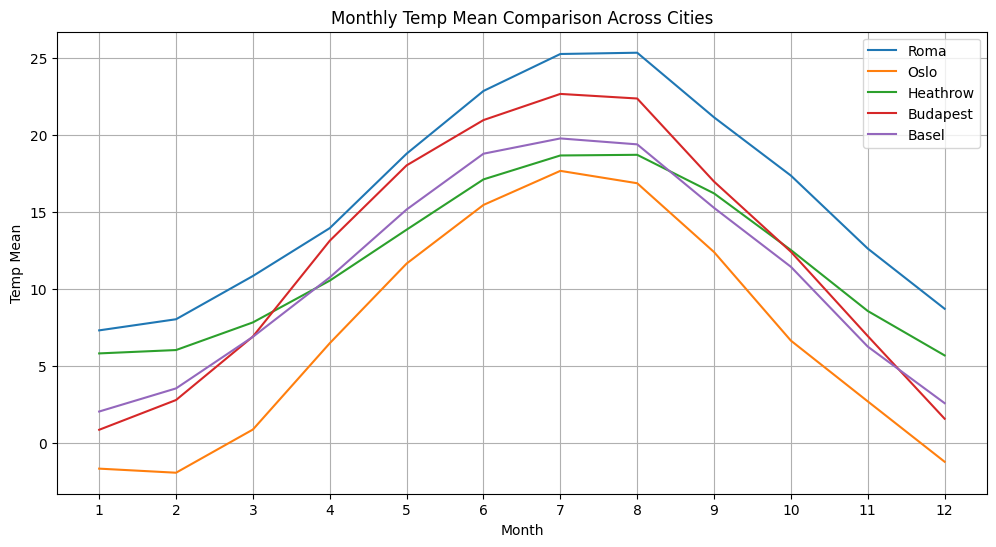

In [23]:
city_dfs = [roma_df, oslo_df, heathrow_df, budapest_df, basel_df]
city_names = ["Roma", "Oslo", "Heathrow", "Budapest", "Basel"]

compare_weather_parameter_across_cities(city_dfs, city_names, 'temp_mean')


**Observations**

Roma consistently experiences the highest temperatures, reaching up to ~25°C in the summer months, indicative of its Mediterranean climate.

Budapest and Basel show moderate peaks, with summer temperatures approaching 22°C, representing a more continental climate with pronounced seasonal swings.

Heathrow demonstrates slightly lower summer temperatures (~20°C), consistent with its mild oceanic climate influenced by the Atlantic.

Oslo records the lowest temperatures throughout the year, often dipping below 0°C in winter, a reflection of its northern latitude and Nordic climate.

**Monthly Sunshine Comparison Across Cities**

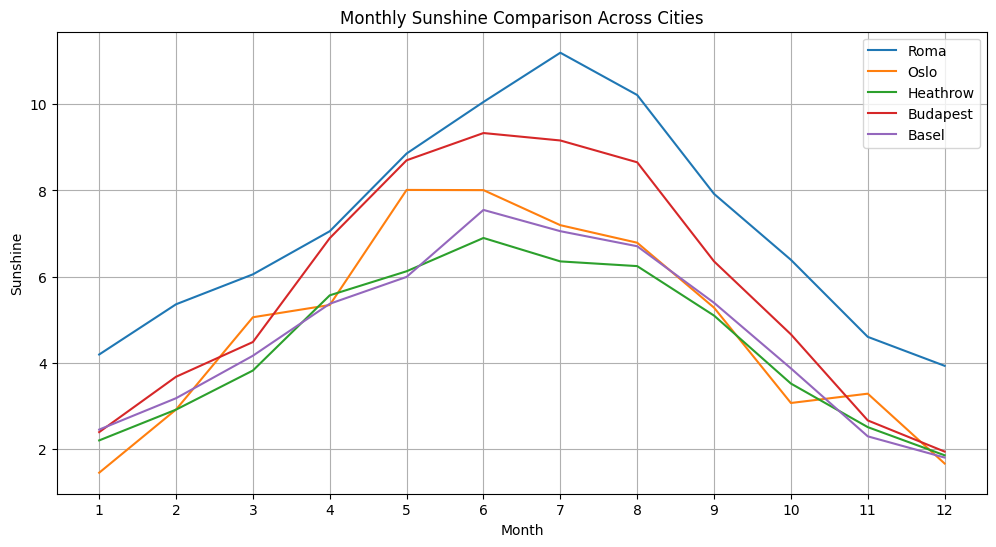

In [24]:
compare_weather_parameter_across_cities(city_dfs, city_names, 'sunshine')

**Observations**

Roma consistently records the highest sunshine duration, surpassing 10 hours/day in July. Its curve is smooth and symmetric, reflecting stable Mediterranean conditions with long, dry summers and clear skies.

Budapest follows a similar trend, though with a slightly lower peak (~9.5 hours/day). Its curve suggests a strong seasonal rhythm with some variability likely due to continental weather influences.

Oslo and Basel both show notable peaks around 8 hours/day in May-June. Oslo's strong seasonal variation is a result of its high latitude, while Basel benefits from a more continental-alpine climate with generally clear spring and early summer skies.

Heathrow presents the lowest peak among the five cities, reaching just under 7 hours/day in June. Its curve is relatively symmetric but remains consistently lower, likely due to persistent cloud cover typical of the UK's oceanic climate.




**Monthly Global Radiation Comparison Across Cities**

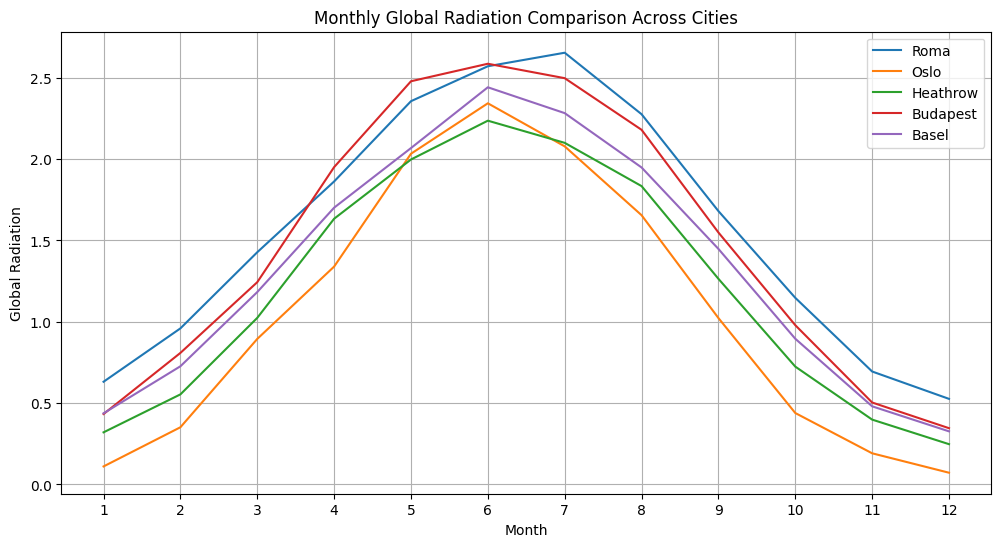

In [25]:
compare_weather_parameter_across_cities(city_dfs, city_names, 'global_radiation')

**Observations**

Roma and Budapest record the highest peaks, with global radiation exceeding 2.5 W/m² during June and July. Roma's consistent upward trend aligns with its Mediterranean location, while Budapest shows a sharp rise typical of continental climates.

Basel and Oslo follow closely, each peaking just under 2.5 W/m² around June, despite their very different latitudes. Oslo's long summer days and relatively clear conditions explain its high solar gain, while Basel benefits from relatively unobstructed alpine skies.

Heathrow has the lowest peak, just below 2.2 W/m², which aligns with the UK's frequently overcast, marine-influenced weather — limiting direct solar radiation even during the longest days of the year.




**Monthly Cloud Cover Comparison Across Cities**

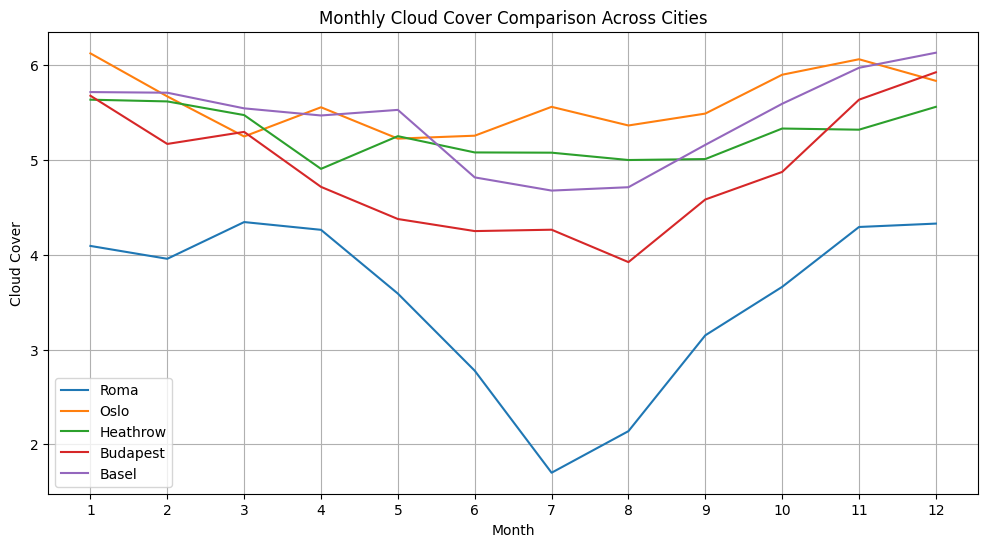

In [26]:
compare_weather_parameter_across_cities(city_dfs, city_names, 'cloud_cover')

**Observation**

 The five cities exhibit varied cloud cover patterns, with Roma consistently displaying the lowest values, while Oslo, Heathrow, and Basel show the highest and most stable cloudiness throughout the year.

Oslo, Heathrow, and Basel maintain relatively flat cloud cover curves, with only minor seasonal fluctuations. This consistency suggests persistently overcast conditions, especially in northern and western Europe.

Budapest shows a distinct seasonal trend, with cloud cover gradually decreasing from January to a minimum in July, before climbing again toward December. This pattern reflects continental summer clearing and increased winter cloudiness.

Roma exhibits the clearest seasonal dip, dropping to its minimum in July (around 1.7 on the cloud cover scale), and rising again through autumn and winter. This strongly aligns with its Mediterranean climate, where summers are typically dry and cloud-free.

**Monthly Humidity Comparison Across Cities**

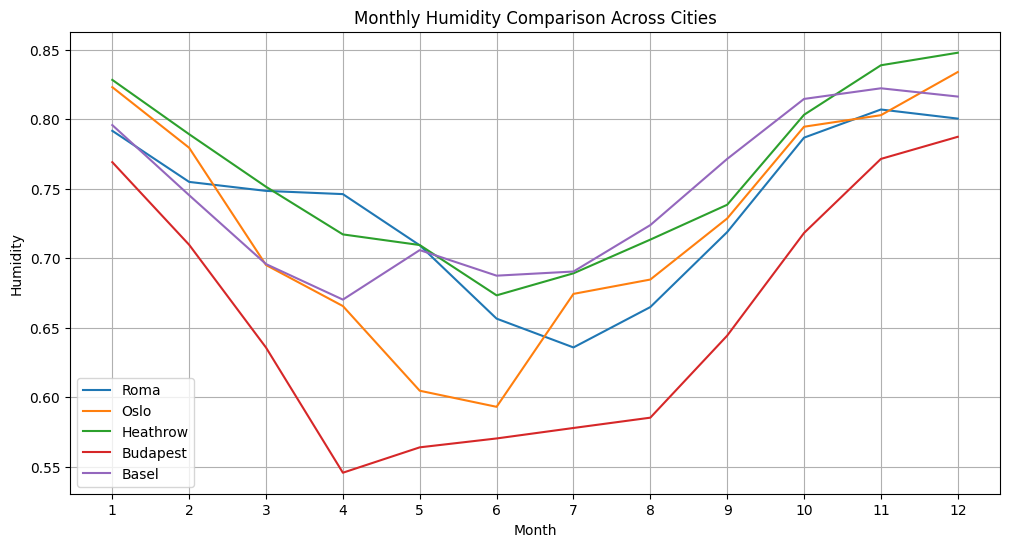

In [27]:
compare_weather_parameter_across_cities(city_dfs, city_names, 'humidity')

**Observation**

All five cities display a U-shaped seasonal pattern in relative humidity — with high levels in the winter months, a dip during the summer, and a gradual rise again in the autumn. This pattern aligns with typical temperate climate behavior where colder air holds less moisture and summer warmth often reduces relative humidity.

Heathrow and Oslo exhibit the highest humidity levels, starting above 80% in January. Both cities experience a drop to around 70% or slightly lower in early summer before humidity begins rising again.

Roma and Basel follow a nearly similar curve, though with slightly lower humidity overall. Roma's Mediterranean climate contributes to a notably dry summer dip, especially in July.

Budapest shows the lowest overall humidity across the year. It starts just above 75% in January, reaches a minimum of ~55% in April, and then climbs steadily again through the end of the year. This pronounced dip reflects Budapest's continental climate, characterized by hot, dry summers and cooler, wetter winters.

**YEARLY TREND ANALYSIS ACROSS EUROPE**

In [28]:
df.dtypes

DATE                        int64
MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
                           ...   
TOURS_global_radiation    float64
TOURS_precipitation       float64
TOURS_temp_mean           float64
TOURS_temp_min            float64
TOURS_temp_max            float64
Length: 165, dtype: object

In [29]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d', errors='coerce')

In [30]:
df['DATE'].dtype

dtype('<M8[ns]')

In [31]:
df['Year']=df['DATE'].dt.year

In [32]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0 2000-01-01      1                  8            0.89          1.0286   
1 2000-01-02      1                  8            0.87          1.0318   
2 2000-01-03      1                  5            0.81          1.0314   
3 2000-01-04      1                  7            0.79          1.0262   
4 2000-01-05      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  TOURS_wind_speed  \
0              2.9             1.6  ...                 0.7               1.6   
1              3.6             2.7  ...                 2.0               2.0   
2              2.2             0.1  ...                 2.8               3.4   
3              3.9             0.5  ...                 4.6               4.9   
4              6.0             3.8  ...                 2.9               3.6   

   TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
0            0.97          1.0275                    0.25   
1            0.99          1.0293                    0.17   
2            0.91          1.0267                    0.27   
3            0.95          1.0222                    0.11   
4            0.95          1.0209                    0.39   

   TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  Year  
0                 0.04              8.5             7.2             9.8  2000  
1                 0.16              7.9             6.6             9.2  2000  
2                 0.00              8.1             6.6             9.6  2000  
3                 0.44              8.6             6.4            10.8  2000  
4                 0.04              8.0             6.4             9.5  2000  

[5 rows x 166 columns]

In [33]:
df.describe()

DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count                 3654  3654.000000        3654.000000     3654.000000   
mean   2004-12-31 12:00:00     6.520799           5.418446        0.745107   
min    2000-01-01 00:00:00     1.000000           0.000000        0.380000   
25%    2002-07-02 06:00:00     4.000000           4.000000        0.670000   
50%    2004-12-31 12:00:00     7.000000           6.000000        0.760000   
75%    2007-07-02 18:00:00    10.000000           7.000000        0.830000   
max    2010-01-01 00:00:00    12.000000           8.000000        0.980000   
std                    NaN     3.450083           2.325497        0.107788   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380             0.234849   
min          0.985600                0.050000             0.000000   
25%          1.013300                0.530000             0.000000   
50%          1.017700                1.110000             0.000000   
75%          1.022700                2.060000             0.210000   
max          1.040800                3.550000             7.570000   
std          0.007962                0.935348             0.536267   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
count     3654.000000      3654.000000     3654.000000  ...   
mean         4.661193        11.022797        6.989135  ...   
min          0.000000        -9.300000      -16.000000  ...   
25%          0.500000         5.300000        2.000000  ...   
50%          3.600000        11.400000        7.300000  ...   
75%          8.000000        16.900000       12.400000  ...   
max         15.300000        29.000000       20.800000  ...   
std          4.330112         7.414754        6.653356  ...   

       STOCKHOLM_temp_max  TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
count         3654.000000       3654.000000     3654.000000     3654.000000   
mean            11.470635          3.677258        0.781872        1.016639   
min            -14.500000          0.700000        0.330000        0.000300   
25%              4.100000          2.600000        0.700000        1.012100   
50%             11.000000          3.400000        0.800000        1.017300   
75%             19.000000          4.600000        0.870000        1.022200   
max             32.900000         10.800000        1.000000        1.041400   
std              8.950217          1.519866        0.115572        0.018885   

       TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
count             3654.000000          3654.000000      3654.000000   
mean                 1.369787             0.186100        12.205802   
min                  0.050000             0.000000        -6.200000   
25%                  0.550000             0.000000         7.600000   
50%                  1.235000             0.000000        12.300000   
75%                  2.090000             0.160000        17.200000   
max                  3.560000             6.200000        31.200000   
std                  0.926472             0.422151         6.467155   

       TOURS_temp_min  TOURS_temp_max         Year  
count     3654.000000     3654.000000  3654.000000  
mean         7.860536       16.551779  2004.501095  
min        -13.000000       -3.100000  2000.000000  
25%          3.700000       10.800000  2002.000000  
50%          8.300000       16.600000  2004.500000  
75%         12.300000       22.400000  2007.000000  
max         22.600000       39.800000  2010.000000  
std          5.692256        7.714924     2.874103  

[8 rows x 166 columns]

In [34]:
df_2010 = df[df['DATE'].dt.year == 2010]

In [35]:
df_2010

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
3653 2010-01-01      1                  8            0.93          0.9965   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
3653                    0.08                 0.56             0.0   

      BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
3653              2.9            -0.2  ...                -7.0   

      TOURS_wind_speed  TOURS_humidity  TOURS_pressure  \
3653               3.4            0.86           1.004   

      TOURS_global_radiation  TOURS_precipitation  TOURS_temp_mean  \
3653                    0.11                  0.0              0.5   

      TOURS_temp_min  TOURS_temp_max  Year  
3653            -0.7             1.8  2010  

[1 rows x 166 columns]

In [36]:
df_yearly=df.copy()
df_yearly.drop(columns='DATE', inplace=True)
europe_yearly=df_yearly.groupby('Year').mean(numeric_only=True)


In [37]:
europe_yearly

MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
Year                                                                
2000  6.513661           5.377049        0.732923        1.017659   
2001  6.526027           5.575342        0.765397        1.017868   
2002  6.526027           5.668493        0.766712        1.017286   
2003  6.526027           4.873973        0.702274        1.018347   
2004  6.513661           5.792350        0.745574        1.017880   
2005  6.526027           5.243836        0.757918        1.018998   
2006  6.526027           5.273973        0.759726        1.018338   
2007  6.526027           5.249315        0.741315        1.018461   
2008  6.513661           5.590164        0.744016        1.017560   
2009  6.526027           5.531507        0.734740        1.016425   
2010  1.000000           8.000000        0.930000        0.996500   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
Year                                                                
2000                1.302240             0.214945        4.900000   
2001                1.280164             0.277178        4.506849   
2002                1.258329             0.287205        4.175068   
2003                1.460137             0.168384        5.572055   
2004                1.303060             0.216776        4.247541   
2005                1.336849             0.193425        4.666301   
2006                1.319205             0.281781        4.658082   
2007                1.368767             0.260822        4.896438   
2008                1.311093             0.237596        4.399180   
2009                1.367589             0.209589        4.604384   
2010                0.080000             0.560000        0.000000   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
Year                                                   ...   
2000        11.786612        7.876776       16.174044  ...   
2001        10.746575        6.778356       15.118356  ...   
2002        11.155890        7.187671       15.590959  ...   
2003        11.394521        6.798356       16.578630  ...   
2004        10.546448        6.579781       15.028689  ...   
2005        10.423014        6.325753       14.982466  ...   
2006        10.915342        7.006575       15.403288  ...   
2007        11.314795        7.234795       15.837534  ...   
2008        10.795902        6.946721       15.083607  ...   
2009        11.170959        7.175068       15.600548  ...   
2010         2.900000       -0.200000        4.800000  ...   

      STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
Year                                                             
2000            5.804098           11.654372          3.834973   
2001            4.749863           10.895342          4.000000   
2002            5.089589           11.647945          3.967945   
2003            4.756986           11.229589          3.507123   
2004            4.817486           10.893169          3.679508   
2005            5.090685           11.300548          3.508219   
2006            5.308219           12.215342          3.636712   
2007            5.176438           11.676712          3.716438   
2008            5.621311           11.995082          3.475683   
2009            4.663014           11.248493          3.446849   
2010           -8.800000           -7.000000          3.400000   

      TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
Year                                                           
2000        0.806995        1.016106                1.330929   
2001        0.796630        1.016578                1.262685   
2002        0.790822        1.016065                1.267753   
2003        0.758767        1.017333                1.466027   
2004        0.776366        1.017447                1.404262   
2005        0.767425        1.018521                1.446301   
2006        0.781342        1.01716

In [38]:
europe_yearly = europe_yearly.drop(index=2010)
# the year 2010 had only record, the row was dropped hence.

**Trend of Average Yearly Mean Temprature (2000-2009)**

In [39]:
temp_mean_cols = [col for col in europe_yearly.columns if col.endswith('temp_mean')]
europe_yearly['avg_temp_mean'] = europe_yearly[temp_mean_cols].mean(axis=1)

In [40]:
europe_yearly['smooth_temp'] = europe_yearly['avg_temp_mean'].rolling(window=3, center=True).mean()


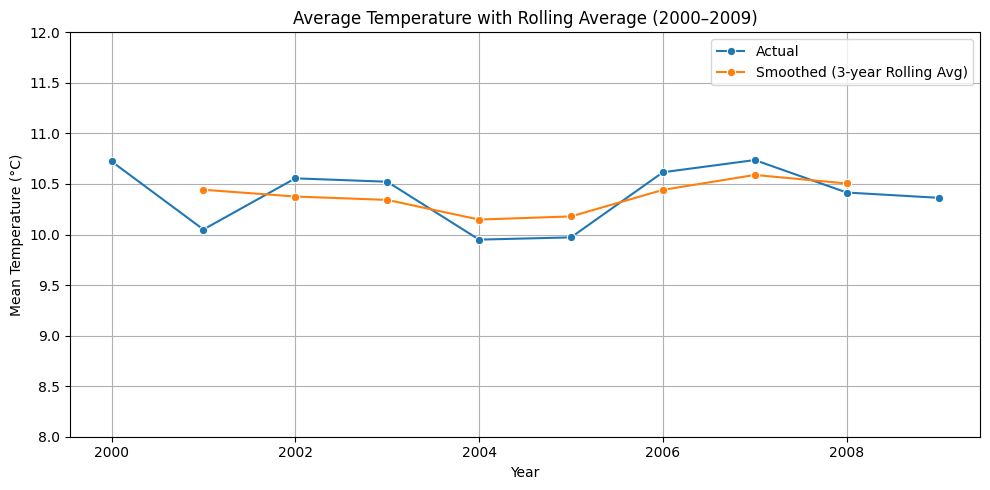

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=europe_yearly.index, y=europe_yearly['avg_temp_mean'], label='Actual', marker='o')
sns.lineplot(x=europe_yearly.index, y=europe_yearly['smooth_temp'], label='Smoothed (3-year Rolling Avg)',marker='o')
plt.title("Average Temperature with Rolling Average (2000–2009)")
plt.ylim(8,12)
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
start = europe_yearly.loc[2001, 'smooth_temp']
end = europe_yearly.loc[2008, 'smooth_temp']
print(f"Change in rolling average: {end - start:.3f} °C")


Change in rolling average: 0.062 °C


**Observation**

The plot shows annual mean temperatures across Europe from 2000 to 2009, along with a 3-year rolling average to smooth out short-term fluctuations.

The actual temperature values fluctuate slightly from year to year but remain within a narrow band (~9.9°C to ~10.7°C).

The 3-year rolling average reveals a subtle upward trend, increasing by approximately 0.062°C over the decade.

This suggests that Europe did not experience a dramatic shift in average temperature during this period — but the slight increase in the rolling average could be an early indicator of long-term warming.

**Trend of Average Yearly Precipitation (2000-2009)**

In [43]:
precip_cols = [col for col in europe_yearly.columns if col.endswith('precipitation')]
europe_yearly['avg_precipitation'] = europe_yearly[precip_cols].mean(axis=1)


In [44]:
europe_yearly['smooth_precip'] = europe_yearly['avg_precipitation'].rolling(window=3, center=True).mean()


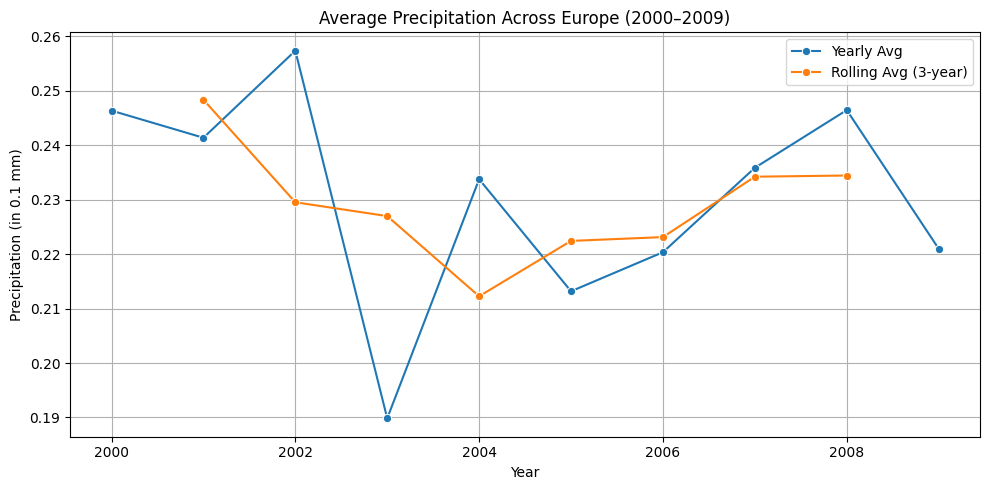

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=europe_yearly.index, y=europe_yearly['avg_precipitation'], label='Yearly Avg',marker='o')
sns.lineplot(x=europe_yearly.index, y=europe_yearly['smooth_precip'], label='Rolling Avg (3-year)',marker='o')
plt.title("Average Precipitation Across Europe (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Precipitation (in 0.1 mm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
start = europe_yearly.loc[2001, 'smooth_precip']
end = europe_yearly.loc[2008, 'smooth_precip']
print(f"Change in rolling average: {end - start:.3f} ")

Change in rolling average: -0.014 


**Observation**

The plot illustrates the annual average precipitation across Europe from 2000 to 2009, accompanied by a 3-year rolling average to highlight underlying trends while minimizing year-to-year variability.

The yearly averages show some notable fluctuations, particularly a sharp drop in 2003, followed by a partial recovery.

Despite this variability, the overall trend captured by the rolling average suggests a slight decline in average precipitation — approximately 0.014 mm over the decade.

This marginal decrease indicates that Europe's precipitation levels remained relatively stable, with no significant long-term increase or decrease during this period.

**Trend of Average Yearly Sunshine (2000-2009)**

In [47]:
sunshine_cols = [col for col in europe_yearly.columns if col.endswith('sunshine')]
europe_yearly['avg_sunshine'] = europe_yearly[sunshine_cols].mean(axis=1)
europe_yearly['smooth_sunshine'] = europe_yearly['avg_sunshine'].rolling(window=3, center=True).mean()


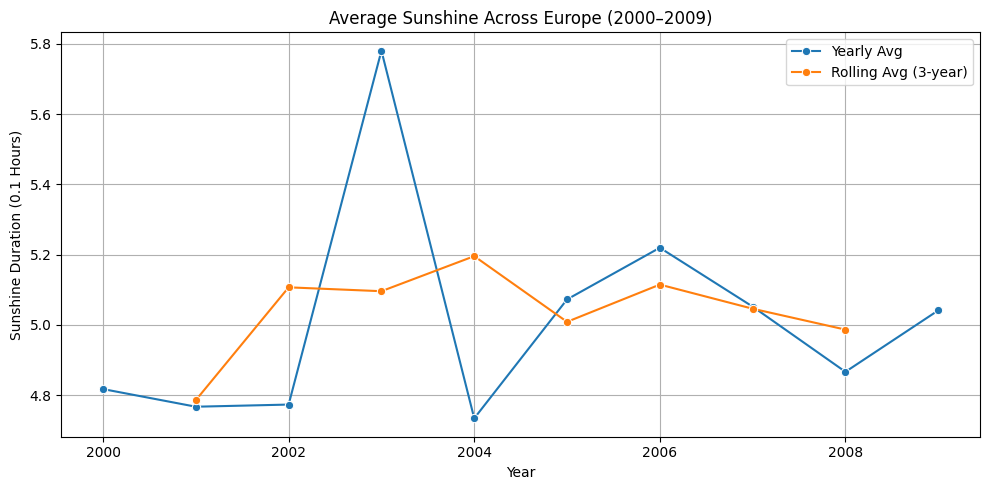

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=europe_yearly.index, y=europe_yearly['avg_sunshine'], label='Yearly Avg',marker='o')
sns.lineplot(x=europe_yearly.index, y=europe_yearly['smooth_sunshine'], label='Rolling Avg (3-year)',marker='o')
plt.title("Average Sunshine Across Europe (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Sunshine Duration (0.1 Hours)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
start = europe_yearly.loc[2001, 'smooth_sunshine']
end = europe_yearly.loc[2008, 'smooth_sunshine']
print(f"Change in rolling average: {end - start:.3f} ")

Change in rolling average: 0.201 


**Observation**

The plot illustrates the annual average sunshine duration across Europe between 2000 and 2009, accompanied by a 3-year rolling average to smooth out year-to-year fluctuations.

The yearly data reveals notable variability, especially a sharp spike in 2003, followed by an immediate drop in 2004. This could reflect an unusually clear summer followed by a return to more typical cloud patterns.

The 3-year rolling average smooths this volatility, showing a subtle upward trend across the decade.

Overall, the average sunshine duration increased by approximately 0.201 hours/day, suggesting a modest increase in solar exposure across Europe over this time period.

This upward trend, while slight, may align with broader patterns of reduced cloud cover or shifting weather systems linked to long-term climate variability.

**Trend of Average Yearly Cloud Cover (2000-2009)**

In [50]:
cloud_cover_cols = [col for col in europe_yearly.columns if col.endswith('cloud_cover')]
europe_yearly['avg_cloud_cover'] = europe_yearly[cloud_cover_cols].mean(axis=1)
europe_yearly['smooth_cloud_cover'] = europe_yearly['avg_cloud_cover'].rolling(window=3, center=True).mean()


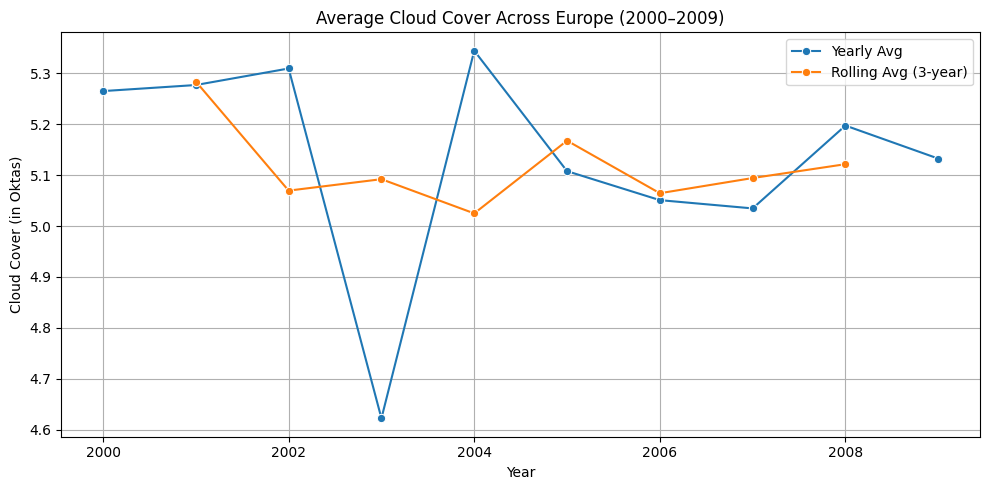

In [51]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=europe_yearly.index, y=europe_yearly['avg_cloud_cover'], label='Yearly Avg', marker='o')
sns.lineplot(x=europe_yearly.index, y=europe_yearly['smooth_cloud_cover'], label='Rolling Avg (3-year)',marker='o')
plt.title("Average Cloud Cover Across Europe (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Cloud Cover (in Oktas)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
start = europe_yearly.loc[2001, 'smooth_cloud_cover']
end = europe_yearly.loc[2008, 'smooth_cloud_cover']
print(f"Change in rolling average: {end - start:.3f} ")

Change in rolling average: -0.162 


**Observation**

This plot displays the annual average cloud cover across Europe from 2000 to 2009, along with a 3-year rolling average to highlight the underlying trend.

The yearly data shows significant variation, with a sharp dip in 2003, likely corresponding to the unusually clear and hot summer observed across much of Europe that year. This was followed by a notable spike in 2004, suggesting a temporary reversal.

The rolling average smooths out these short-term anomalies and reveals a gradual decline in overall cloud cover over the decade.

Between 2000 and 2009, average cloud cover decreased by approximately 0.162 oktas, pointing to a modest but consistent reduction in cloudiness across the region.

This decline in cloud cover may partially explain the observed increases in sunshine duration and global radiation during the same period.

**Trend of Average Yearly Global Radiation (2000-2009)**

In [53]:
global_radiation_cols = [col for col in europe_yearly.columns if col.endswith('global_radiation')]
europe_yearly['avg_global_radiation'] = europe_yearly[global_radiation_cols].mean(axis=1)
europe_yearly['smooth_global_radiation'] = europe_yearly['avg_global_radiation'].rolling(window=3, center=True).mean()


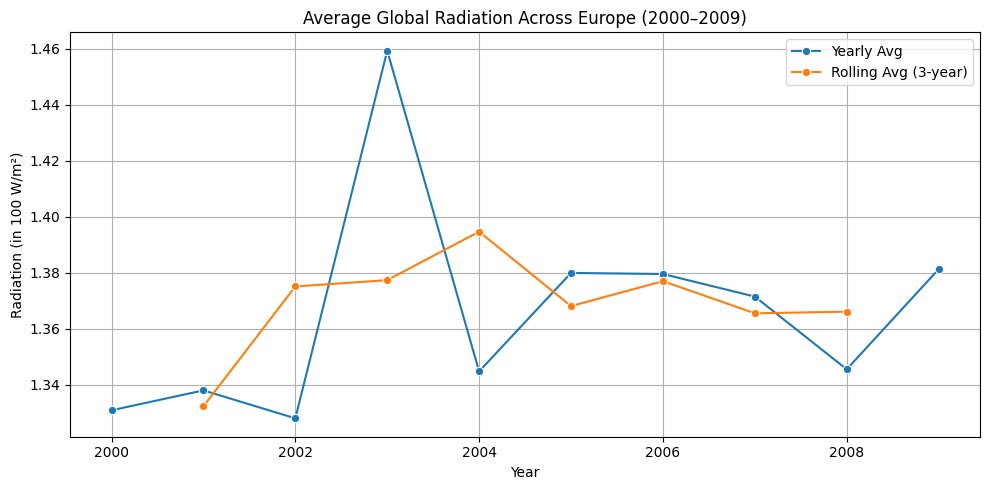

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=europe_yearly.index, y=europe_yearly['avg_global_radiation'], label='Yearly Avg',marker='o')
sns.lineplot(x=europe_yearly.index, y=europe_yearly['smooth_global_radiation'], label='Rolling Avg (3-year)',marker='o')
plt.title("Average Global Radiation Across Europe (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Radiation (in 100 W/m²)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
start = europe_yearly.loc[2001, 'smooth_global_radiation']
end = europe_yearly.loc[2008, 'smooth_global_radiation']
print(f"Change in rolling average: {end - start:.3f} ")

Change in rolling average: 0.034 


**Observation**

This plot presents the annual average global radiation across Europe from 2000 to 2009, with a 3-year rolling average line included to highlight the smoothed trend over time.

The yearly values show a notable spike in 2003, aligning with the unusually hot and clear summer that year, followed by a drop in 2004.

Despite short-term fluctuations, the rolling average reveals a subtle upward trend in global radiation over the decade.

From 2000 to 2009, average global radiation increased by approximately 0.034 (in 100 W/m²), indicating a modest rise in solar energy received at the surface.

This rise corresponds with the decline in cloud cover and increase in sunshine duration observed during the same period, supporting a consistent climatic pattern.

## Modelling

**Objective:** Predict mean daily temperature (temp_mean) for Heathrow

**Feature selection:**

*   Chose weather parameters specific to Heathrow.
*   Applied cyclic encoding to the MONTH column using sine and cosine transformations.

**Feature evaluation:**

*   Performed correlation analysis to understand relationships with the target.
*   Used Variance Inflation Factor (VIF) to ensure multicollinearity was within acceptable limits (VIF < 10).

*   Selected 4 independent variables: global_radiation, humidity, month_cos, month_sin.

**Modeling approach:**

*   Used TimeSeriesSplit to preserve temporal order in cross-validation.
*   Trained and validated three models: **Polynomial Regression, Random Forest Regressor and Gradient Boosting Regressor**

**Evaluation:**

*   Assessed using R² and RMSE on training and validation sets.
*   Final models were retrained on the full development set and evaluated on a separate test set.














In [56]:
df_model=df.copy()

In [57]:
df_model.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0 2000-01-01      1                  8            0.89          1.0286   
1 2000-01-02      1                  8            0.87          1.0318   
2 2000-01-03      1                  5            0.81          1.0314   
3 2000-01-04      1                  7            0.79          1.0262   
4 2000-01-05      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  TOURS_wind_speed  \
0              2.9             1.6  ...                 0.7               1.6   
1              3.6             2.7  ...                 2.0               2.0   
2              2.2             0.1  ...                 2.8               3.4   
3              3.9             0.5  ...                 4.6               4.9   
4              6.0             3.8  ...                 2.9               3.6   

   TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
0            0.97          1.0275                    0.25   
1            0.99          1.0293                    0.17   
2            0.91          1.0267                    0.27   
3            0.95          1.0222                    0.11   
4            0.95          1.0209                    0.39   

   TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  Year  
0                 0.04              8.5             7.2             9.8  2000  
1                 0.16              7.9             6.6             9.2  2000  
2                 0.00              8.1             6.6             9.6  2000  
3                 0.44              8.6             6.4            10.8  2000  
4                 0.04              8.0             6.4             9.5  2000  

[5 rows x 166 columns]

In [58]:
df_model['DATE'].dtype

dtype('<M8[ns]')

Dropping 2010 data

In [59]:
df_model = df_model[df_model['Year'] != 2010].copy()


In [60]:
df_model.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_max', 'TOURS_wind_speed', 'TOURS_humidity',
       'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation',
       'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'Year'],
      dtype='object', length=166)

In [61]:
df_model.drop(columns=['DATE','Year'], inplace=True)

In [62]:
df_model.describe()

MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
count  3653.000000        3653.000000     3653.000000     3653.000000   
mean      6.522310           5.417739        0.745056        1.017882   
std       3.449345           2.325423        0.107759        0.007956   
min       1.000000           0.000000        0.380000        0.985600   
25%       4.000000           4.000000        0.670000        1.013300   
50%       7.000000           6.000000        0.760000        1.017700   
75%      10.000000           7.000000        0.830000        1.022700   
max      12.000000           8.000000        0.980000        1.040800   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
count             3653.000000          3653.000000     3653.000000   
mean                 1.330723             0.234760        4.662469   
std                  0.935247             0.536314        4.330018   
min                  0.050000             0.000000        0.000000   
25%                  0.530000             0.000000        0.500000   
50%                  1.110000             0.000000        3.600000   
75%                  2.060000             0.210000        8.000000   
max                  3.550000             7.570000       15.300000   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
count      3653.000000     3653.000000     3653.000000  ...   
mean         11.025021        6.991103       15.539721  ...   
std           7.414550        6.653203        8.720706  ...   
min          -9.300000      -16.000000       -5.700000  ...   
25%           5.300000        2.000000        8.700000  ...   
50%          11.400000        7.300000       15.800000  ...   
75%          16.900000       12.400000       22.300000  ...   
max          29.000000       20.800000       38.600000  ...   

       STOCKHOLM_temp_min  STOCKHOLM_temp_max  TOURS_wind_speed  \
count         3653.000000         3653.000000       3653.000000   
mean             5.108021           11.475691          3.677334   
std              7.248085            8.946221          1.520067   
min            -19.700000          -14.500000          0.700000   
25%              0.000000            4.100000          2.600000   
50%              5.000000           11.000000          3.400000   
75%             11.200000           19.000000          4.600000   
max             21.200000           32.900000         10.800000   

       TOURS_humidity  TOURS_pressure  TOURS_global_radiation  \
count     3653.000000     3653.000000             3653.000000   
mean         0.781851        1.016643                1.370131   
std          0.115581        0.018886                0.926365   
min          0.330000        0.000300                0.050000   
25%          0.700000        1.012100                0.550000   
50%          0.800000        1.017300                1.240000   
75%          0.870000        1.022200                2.090000   
max          1.000000        1.041400                3.560000   

       TOURS_precipitation  TOURS_temp_mean  TOURS_temp_min  TOURS_temp_max  
count          3653.000000      3653.000000     3653.000000     3653.000000  
mean              0.186151        12.209006        7.862880       16.555817  
std               0.422198         6.465138        5.691272        7.712116  
min               0.000000        -6.200000      -13.000000       -3.100000  
25%               0.000000         7.600000        3.700000       10.800000  
50%               0.000000        12.300000        8.300000       16.600000  
75%               0.160000        17.200000       12.300000       22.400000  
max               6.200000        31.200000       22.600000       39.800000  

[8 rows x 164 columns]

## Heathrow weather prediction

In [63]:
city = 'HEATHROW'
weather_params = [
    'temp_mean','cloud_cover', 'sunshine', 'global_radiation',
    'precipitation', 'humidity', 'pressure'
]

# Create full column names for Heathrow
city_cols = [f"{city}_{param}" for param in weather_params]

city_df = df_model[city_cols + ['MONTH']].copy()

# Rename the target column for clarity
city_df.rename(columns={f"{city}_temp_mean": "target_temp"}, inplace=True)

# Remove 'HEATHROW_' from feature column names
city_df.columns = ['target_temp'] + [col.split('_',1)[1] for col in city_cols if col != f"{city}_temp_mean"] + ['MONTH']


In [64]:
city_df.head()

target_temp  cloud_cover  sunshine  global_radiation  precipitation  \
0          7.0            7       0.4              0.18           0.00   
1          7.9            7       0.7              0.20           0.02   
2          9.4            8       0.0              0.13           0.60   
3          7.0            5       2.9              0.34           0.02   
4          6.4            5       1.3              0.25           0.08   

   humidity  pressure  MONTH  
0      0.94    1.0245      1  
1      0.89    1.0253      1  
2      0.91    1.0186      1  
3      0.89    1.0148      1  
4      0.85    1.0142      1

In [65]:
city_df.isna().sum()

target_temp         0
cloud_cover         0
sunshine            0
global_radiation    0
precipitation       0
humidity            0
pressure            0
MONTH               0
dtype: int64

**Cyclic Feature Encoding**

In [66]:
# Assuming MONTH is still in your DataFrame as an integer (1–12)
city_df['month_sin'] = np.sin(2 * np.pi * city_df['MONTH'] / 12)
city_df['month_cos'] = np.cos(2 * np.pi * city_df['MONTH'] / 12)


In [67]:
city_df.drop(columns=['MONTH'], inplace=True)


**Correlation Analysis**

In [68]:
correlation_matrix = city_df.corr(numeric_only=True)


In [69]:
correlation_with_target = correlation_matrix['target_temp'].sort_values(ascending=False)

In [70]:
print(correlation_with_target)

target_temp         1.000000
global_radiation    0.646801
sunshine            0.377646
precipitation      -0.013801
pressure           -0.019015
cloud_cover        -0.074976
humidity           -0.444303
month_sin          -0.521236
month_cos          -0.683491
Name: target_temp, dtype: float64


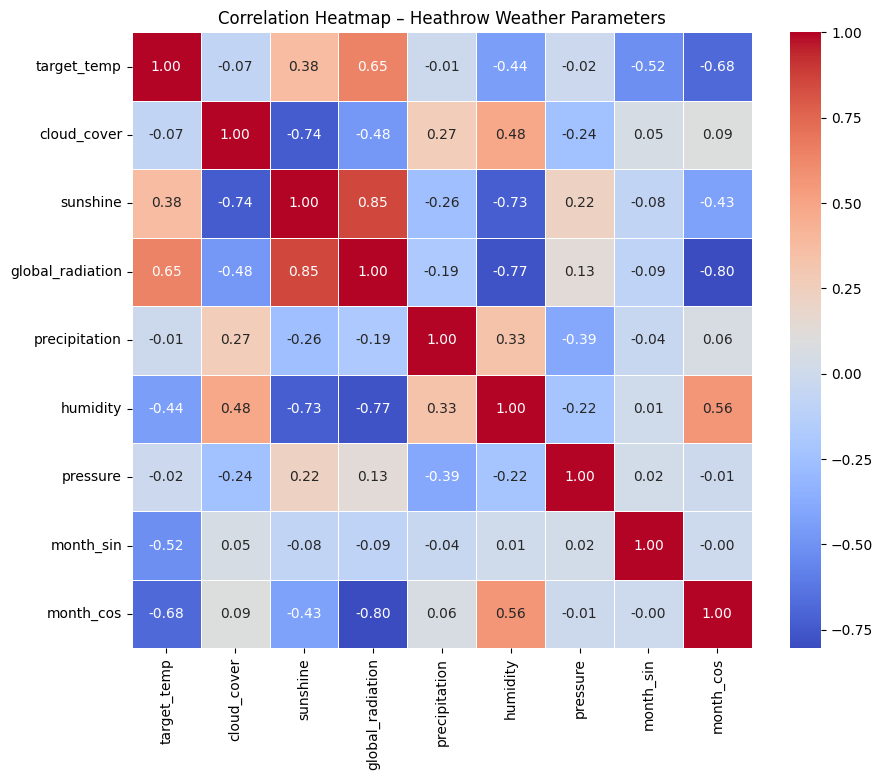

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap – Heathrow Weather Parameters")
plt.show()

**Observation**

Global radiation,month_sin,month_cos are strongly correlated with the variable target_temp.

Humidity shows moderate correlation with variable target_temp.

**pair wise correlation**

In [72]:
def pairwise_feature_correlations(df, exclude_columns=None):
    """
    Compute pairwise Pearson correlations between all numeric features in a DataFrame.

    Parameters:
    df : pandas.DataFrame
        The input DataFrame with numeric features.
    exclude_columns : list, optional
        List of column names to exclude from the correlation check (e.g., target or non-numeric).

    Returns:
    pd.DataFrame
        A DataFrame listing feature pairs and their correlation values.
    """
    if exclude_columns is None:
        exclude_columns = []


    features = [col for col in df.columns if col not in exclude_columns]

    results = []
    for f1, f2 in combinations(features, 2):
        try:
            corr, _ = pearsonr(df[f1].astype(float), df[f2].astype(float))
            results.append((f1, f2, round(corr, 3)))
        except Exception:
            results.append((f1, f2, None))

    corr_df = pd.DataFrame(results, columns=["Feature 1", "Feature 2", "Correlation"])
    corr_df.sort_values(by="Correlation", key=lambda x: abs(x.fillna(0)), ascending=False, inplace=True)
    return corr_df

In [73]:
# Exclude 'target_temp' from correlation checks
correlation_df = pairwise_feature_correlations(city_df, exclude_columns=['target_temp'])

# Display the most correlated feature pairs
print(correlation_df.head(10))

           Feature 1         Feature 2  Correlation
7           sunshine  global_radiation        0.854
17  global_radiation         month_cos       -0.804
14  global_radiation          humidity       -0.769
0        cloud_cover          sunshine       -0.737
9           sunshine          humidity       -0.732
24          humidity         month_cos        0.563
3        cloud_cover          humidity        0.483
1        cloud_cover  global_radiation       -0.476
12          sunshine         month_cos       -0.428
19     precipitation          pressure       -0.391


**Variance Inflation Factor**

In [74]:
# Select the relevant features (including all MONTH_* columns)
X_subset = city_df[['humidity', 'global_radiation', 'month_cos','month_sin']].copy()
X_subset.dropna(inplace=True)
# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_subset.columns
vif_data["VIF"] = [variance_inflation_factor(X_subset.values, i) for i in range(X_subset.shape[1])]

print(vif_data)

            Feature       VIF
0          humidity  4.566002
1  global_radiation  5.919438
2         month_cos  2.702601
3         month_sin  1.016552


All selected features have VIF values below 10, indicating acceptable multicollinearity levels, and were therefore retained as independent variables for modeling.

In [75]:
# Input features (exclude target)
X=city_df[['global_radiation','humidity','month_cos','month_sin']].copy()
# Target variable
y = city_df['target_temp']


**Model Training and Cross Validation**



In [76]:
def cross_validate_model(X_dev, y_dev, model, scaler=None, transformer=None, n_splits=5):
    """
    Cross-validates any sklearn model using TimeSeriesSplit.
    Accepts optional scaler and feature transformer (e.g., PolynomialFeatures).
    """
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import r2_score, mean_squared_error
    import numpy as np

    tscv = TimeSeriesSplit(n_splits=n_splits)
    r2_train_scores, r2_val_scores = [], []
    rmse_train_scores, rmse_val_scores = [], []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_dev)):
        X_train, X_val = X_dev.iloc[train_idx], X_dev.iloc[val_idx]
        y_train, y_val = y_dev.iloc[train_idx], y_dev.iloc[val_idx]

        # Apply scaling (if provided)
        if scaler:
            scaler_fitted = scaler.fit(X_train)
            X_train = scaler_fitted.transform(X_train)
            X_val = scaler_fitted.transform(X_val)

        # Apply transformation (if provided)
        if transformer:
            transformer_fitted = transformer.fit(X_train)
            X_train = transformer_fitted.transform(X_train)
            X_val = transformer_fitted.transform(X_val)

        # Clone model each fold to avoid reuse
        from sklearn.base import clone
        model_fitted = clone(model)
        model_fitted.fit(X_train, y_train)

        # Predict
        y_train_pred = model_fitted.predict(X_train)
        y_val_pred = model_fitted.predict(X_val)

        # Scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_val = r2_score(y_val, y_val_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

        r2_train_scores.append(r2_train)
        r2_val_scores.append(r2_val)
        rmse_train_scores.append(rmse_train)
        rmse_val_scores.append(rmse_val)

        print(f"\nFold {fold + 1}")
        print(f"R² Train: {r2_train:.3f}, R² Val: {r2_val:.3f}")
        print(f"RMSE Train: {rmse_train:.3f}, RMSE Val: {rmse_val:.3f}")

    # Summary
    print("\n Cross-Validation Summary:")
    print(f"Avg R² (Train): {np.mean(r2_train_scores):.3f}")
    print(f"Avg R² (Val):   {np.mean(r2_val_scores):.3f}")
    print(f"Avg RMSE (Train): {np.mean(rmse_train_scores):.3f} °C")
    print(f"Avg RMSE (Val):   {np.mean(rmse_val_scores):.3f} °C")


**Final Model training**

In [77]:
def train_final_model(X_train_full, y_train_full, model, scaler=None, transformer=None):
    """
    Trains a final model on the full training (dev) set.
    Returns the trained model, fitted scaler, and fitted transformer.
    """
    from sklearn.base import clone

    # Clone the base model to start fresh
    model_final = clone(model)

    # Scale
    if scaler:
        scaler = scaler.fit(X_train_full)
        X_train_full = scaler.transform(X_train_full)

    # Transform
    if transformer:
        transformer = transformer.fit(X_train_full)
        X_train_full = transformer.transform(X_train_full)

    # Fit model
    model_final.fit(X_train_full, y_train_full)

    return model_final, scaler, transformer


**Test Function**

In [78]:
def evaluate_final_model(X_test, y_test, model, scaler=None, transformer=None, dataset_name="Test Set"):
    """
    Evaluates a trained model on the test set, prints metrics, and plots predictions vs. actuals and residuals.
    """

    # Apply scaler if provided
    if scaler:
        X_test = scaler.transform(X_test)

    # Apply transformer if provided
    if transformer:
        X_test = transformer.transform(X_test)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n {dataset_name} Evaluation:")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.3f} °C")

    # Plot: Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Temperature (°C)")
    plt.ylabel("Predicted Temperature (°C)")
    plt.title(f"{dataset_name} - Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot: Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(7, 4))
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Temperature (°C)")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"{dataset_name} - Residuals Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return r2, rmse


In [79]:
# 10% of the data reserved as test set (final evaluation)
test_size = int(len(X) * 0.1)

X_dev = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]

y_dev = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]


**Polynomial Regression Model**

In [80]:
# Base model and transformers
model1 = Lasso(alpha=0.1)
scaler1 = StandardScaler()
transformer1 = PolynomialFeatures(degree=3, include_bias=False)


In [81]:
cross_validate_model(
    X_dev, y_dev,
    model=model1,
    scaler=scaler1,
    transformer=transformer1,
    n_splits=5
)



Fold 1
R² Train: 0.758, R² Val: 0.737
RMSE Train: 2.587, RMSE Val: 2.699

Fold 2
R² Train: 0.757, R² Val: 0.742
RMSE Train: 2.622, RMSE Val: 2.962

Fold 3
R² Train: 0.757, R² Val: 0.752
RMSE Train: 2.709, RMSE Val: 2.925

Fold 4
R² Train: 0.757, R² Val: 0.758
RMSE Train: 2.763, RMSE Val: 2.865

Fold 5
R² Train: 0.759, R² Val: 0.752
RMSE Train: 2.772, RMSE Val: 2.597

 Cross-Validation Summary:
Avg R² (Train): 0.758
Avg R² (Val):   0.748
Avg RMSE (Train): 2.690 °C
Avg RMSE (Val):   2.810 °C


The model achieved an average R² of 0.758 on the training set and 0.748 on the validation set, indicating that it was able to explain approximately 75% of the variance in daily mean temperature. The small difference between training and validation R² suggests that the model generalizes well to unseen data and does not suffer from significant overfitting.

The RMSE — which represents the average error in predicted temperature — was 2.690°C on the training set and 2.810°C on the validation set.

In [82]:
final_model_1, final_scaler_1, final_transformer_1= train_final_model(
    X_train_full=X_dev,
    y_train_full=y_dev,
    model=model1,
    scaler=scaler1,
    transformer=transformer1
)

**Random Forest Regression**

In [83]:
model2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)
scaler2 = None
transformer2 = None


In [84]:
cross_validate_model(
    X_dev, y_dev,
    model=model2,
    scaler=scaler2,
    transformer=transformer2,
    n_splits=5
)


Fold 1
R² Train: 0.817, R² Val: 0.717
RMSE Train: 2.247, RMSE Val: 2.799

Fold 2
R² Train: 0.820, R² Val: 0.739
RMSE Train: 2.256, RMSE Val: 2.978

Fold 3
R² Train: 0.809, R² Val: 0.758
RMSE Train: 2.403, RMSE Val: 2.894

Fold 4
R² Train: 0.804, R² Val: 0.751
RMSE Train: 2.481, RMSE Val: 2.904

Fold 5
R² Train: 0.799, R² Val: 0.742
RMSE Train: 2.534, RMSE Val: 2.646

 Cross-Validation Summary:
Avg R² (Train): 0.810
Avg R² (Val):   0.742
Avg RMSE (Train): 2.384 °C
Avg RMSE (Val):   2.844 °C


The Random Forest model achieved an average R² of 0.810 on the training set and 0.742 on the validation set. This indicates the model fits the training data very well, explaining over 81% of the temperature variance. However, the drop to 74.2% on the validation set suggests some overfitting, as the model performs slightly worse on unseen data.

The RMSE values were 2.384°C (training) and 2.844°C (validation). While the training error is lower (indicating strong fit), the validation RMSE is slightly higher than in the Polynomial model, showing a small trade-off between accuracy and generalization.

In [85]:
final_model_2, final_scaler_2, final_transformer_2 = train_final_model(
    X_train_full=X_dev,
    y_train_full=y_dev,
    model=model2,
    scaler=scaler2,
    transformer=transformer2
)

**Gradient Boost**

In [86]:
model3 = GradientBoostingRegressor(
    n_estimators=200,      # Number of boosting rounds
    learning_rate=0.05,     # Step size (lower = more accurate, slower)
    max_depth=2,           # Depth of each tree
    min_samples_leaf=5,    # Prevents overfitting
    random_state=42
)


In [87]:
# Cross-validation
cross_validate_model(
    X_dev, y_dev,
    model=model3,
    scaler=None,            # Usually not needed for tree-based models
    transformer=None,       # No polynomial features either
    n_splits=5
)
scaler3=None
transformer3=None


Fold 1
R² Train: 0.811, R² Val: 0.719
RMSE Train: 2.287, RMSE Val: 2.788

Fold 2
R² Train: 0.790, R² Val: 0.738
RMSE Train: 2.439, RMSE Val: 2.988

Fold 3
R² Train: 0.778, R² Val: 0.756
RMSE Train: 2.588, RMSE Val: 2.905

Fold 4
R² Train: 0.776, R² Val: 0.755
RMSE Train: 2.651, RMSE Val: 2.880

Fold 5
R² Train: 0.774, R² Val: 0.745
RMSE Train: 2.685, RMSE Val: 2.633

 Cross-Validation Summary:
Avg R² (Train): 0.786
Avg R² (Val):   0.743
Avg RMSE (Train): 2.530 °C
Avg RMSE (Val):   2.839 °C


The Gradient Boosting model achieved an average R² of 0.786 on the training set and 0.743 on the validation set, showing that it explains around 74-79% of the variance in the target variable. The small difference between training and validation R² suggests good generalization with minimal overfitting.

The RMSE was 2.530°C on the training set and 2.839°C on the validation set, indicating that prediction errors remain consistently low across both seen and unseen data. While slightly less accurate on training data compared to Random Forest, it generalizes equally well on validation data.

In [88]:
final_model_3, final_scaler_3, final_transformer_3= train_final_model(
    X_train_full=X_dev,
    y_train_full=y_dev,
    model=model3,
    scaler=scaler3,
    transformer=transformer3
)

**Final Testing**


 Polynomial Model – Test Set Evaluation:
R²: 0.794
RMSE: 2.663 °C


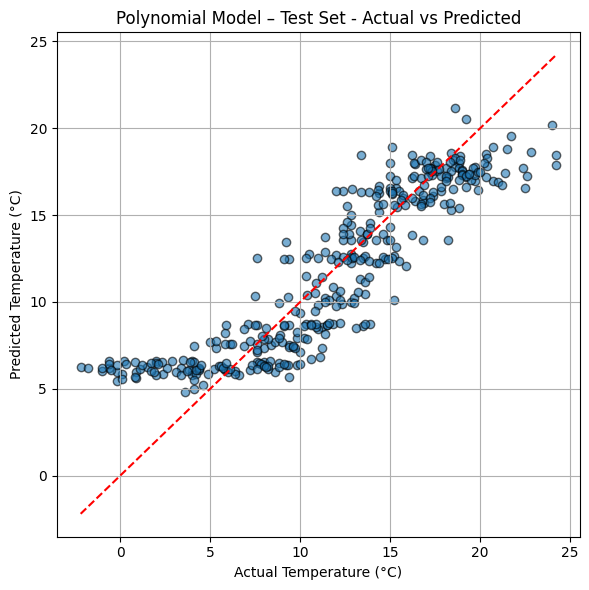

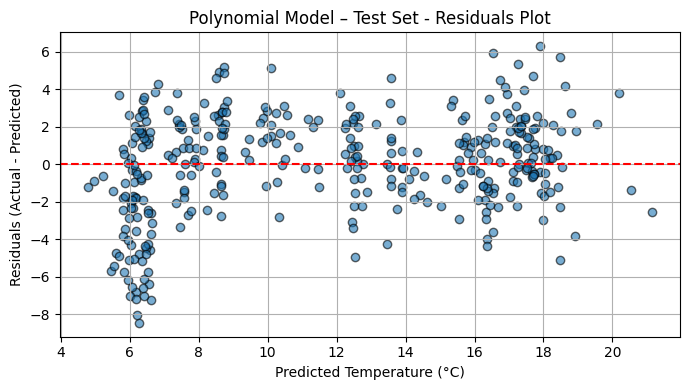

(0.7936110690081588, np.float64(2.6626060737638273))

In [89]:
evaluate_final_model(X_test, y_test, final_model_1, scaler=final_scaler_1, transformer=final_transformer_1, dataset_name="Polynomial Model – Test Set")

**Model Evaluation – Polynomial Regression (Test Set)**


The polynomial regression model achieved an R² of 0.794 on the test set, indicating that approximately 79% of the variance in the mean daily temperature is explained by the selected features. The RMSE of 2.663°C suggests a moderate level of prediction error, which is acceptable given the natural variability in weather data.

The Actual vs. Predicted plot shows points closely aligned around the diagonal, confirming that the model performs well across the temperature range, though there is slight underestimation at higher temperatures and overfitting near the mid-range.

The residual plot reveals a fairly even spread of errors around zero, without strong visible patterns—supporting the assumption of normally distributed residuals. However, some minor heteroscedasticity and larger residuals at temperature extremes suggest areas where the model's performance could be improved.


 Random Forest – Test Set Evaluation:
R²: 0.797
RMSE: 2.637 °C


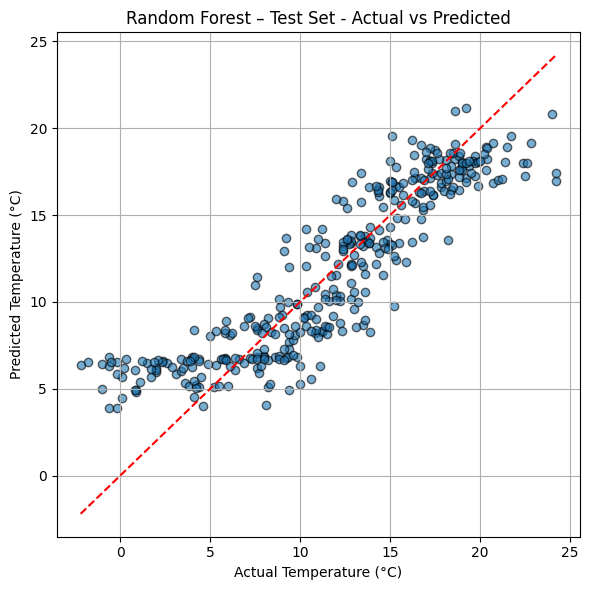

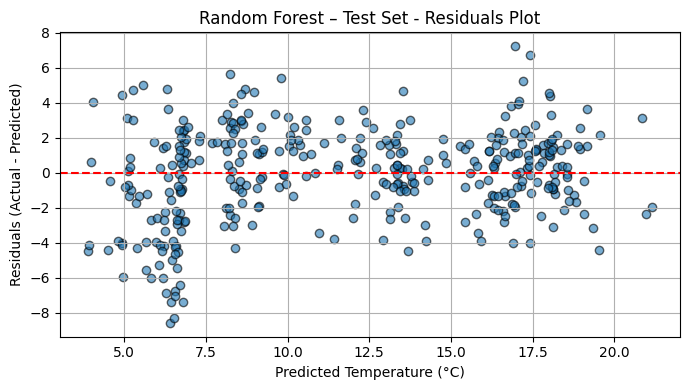

(0.7974924918391038, np.float64(2.6374502870820176))

In [90]:
evaluate_final_model(X_test, y_test, final_model_2, scaler=final_scaler_2, transformer=final_transformer_2, dataset_name="Random Forest – Test Set")

**Model Evaluation- Random Forest (Test Set)**

The Random Forest model achieved an R² score of 0.797 and a Root Mean Squared Error (RMSE) of 2.637°C on the test set, indicating strong predictive performance. The R² score suggests that nearly 80% of the variance in actual temperature values is captured by the model.

In the Actual vs Predicted plot, points are tightly clustered around the diagonal reference line, demonstrating good agreement between predicted and actual temperatures. There is no noticeable systematic under- or over-prediction.

The residuals plot further supports the model's reliability. Residuals are centered around zero and show no obvious patterns or trends, suggesting that the model errors are randomly distributed and not biased across the range of predicted temperatures.


 Gradient Boost – Test Set Evaluation:
R²: 0.801
RMSE: 2.615 °C


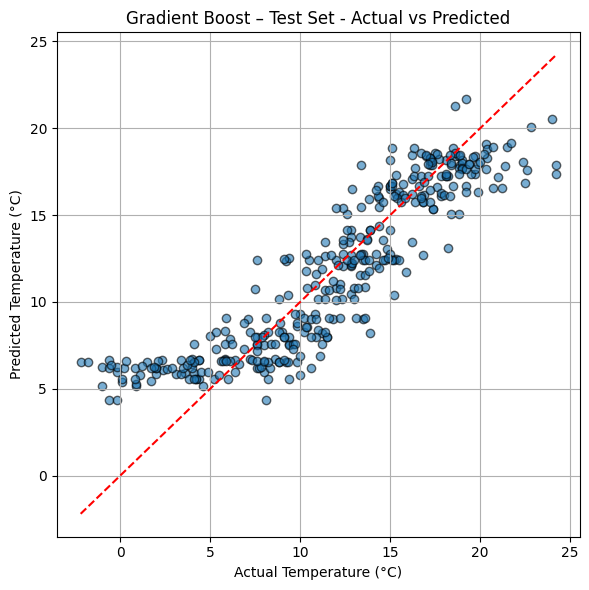

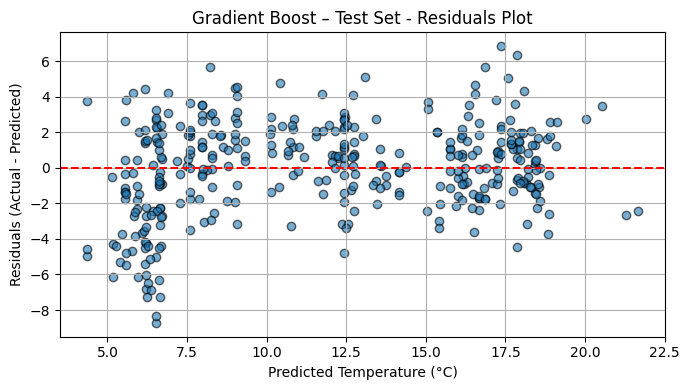

(0.8009740472460921, np.float64(2.614680171181072))

In [91]:
evaluate_final_model(X_test, y_test, final_model_3, scaler=final_scaler_3, transformer=final_transformer_3, dataset_name="Gradient Boost – Test Set")

**Model Evaluation- Gradient Boost(Test Set)**

The Gradient Boost model achieved an R² of 0.801 and a Root Mean Squared Error (RMSE) of 2.615 °C, indicating strong predictive performance. The high R² suggests that approximately 80% of the variance in actual temperatures is explained by the model, while the low RMSE reflects accurate predictions with minimal error.

The Actual vs. Predicted plot shows a tight clustering of points around the diagonal line, reinforcing the model's reliability in forecasting temperature. The residuals plot further supports this, with most errors scattered evenly around zero, implying no major bias or systematic error across the temperature range.

This performance, especially the balance between error and generalization, demonstrates the Gradient Boost model's effectiveness in capturing complex relationships in the data without excessive overfitting.

**Model Comparison and Final Evaluation:**

Among the three models evaluated — Polynomial Regression, Random Forest, and Gradient Boost — the Gradient Boost model delivered the best overall performance on the test set. It achieved the highest R² score (0.801) and the lowest RMSE (2.615°C), indicating strong accuracy and generalization capabilities.

Polynomial Regression provided reasonable performance (R² = 0.794, RMSE = 2.663°C), but slightly underperformed compared to the ensemble methods.

Random Forest also performed well (R² = 0.797, RMSE = 2.637°C), showing robust accuracy, though with a slightly higher prediction error than Gradient Boost.

Gradient Boost consistently outperformed both models in both R² and RMSE, and showed tighter prediction alignment in the visual plots.

**Conclusion and Future Work**


*   Hyperparameter tuning was not conducted in this project, but implementing methods such as GridSearchCV with TimeSeriesSplit could further optimize model performance and reduce error.
*   Feature engineering was kept minimal, though future iterations could benefit from incorporating lagged variables, rolling statistics, or interaction terms to better capture temporal dependencies.
*   Model interpretability techniques were not applied, but tools like SHAP or permutation-based feature importance could be integrated to improve transparency and trust in the model's predictions.















